When starting to process the GPS data we face the following issue:
- On one side, we have the video + `.fit` file. Their name do not match, but the length (time) more or less does so we can align them.
- On the other hand, we have the U-blx + D-GPS data, which are aligned. Here time is UTC+2, in tenths of seconds.

```
    ┌───────┐       ┌───────┐               ┌───────┐       ┌───────┐
    │       │   √   │       │       ?       │       │   √   │       │
    │ video │  <=>  │ .fit  │    <= X =>    │ D-GPS │  <=>  │ U-blx │
    │       │       │       │               │       │       │       │
    └───────┘       └───────┘               └───────┘       └───────┘
```

So **how can we match the D-GPS data with the video frames?** This gap is what we try to bridge in this notebook.

In [1]:
import pandas as pd
from pandas.io.pytables import HDFStore
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys, os, time
sys.path.append('../scripts/')
import fit2csv

# Correspondance video vs `.fit`

## Convert `.fit` to `.csv`

The following `.fit` files correspond to the Tesla:

In [2]:
!ls -lah "../data/raw/day 4/GMetrix/"

total 49M
drwxr-sr-x 2 jovyan users 4.0K Jul 22 22:25 .
drwxr-sr-x 5 jovyan users 4.0K Jul 22 22:24 ..
-rw-r--r-- 1 jovyan users  22M Jul 22 15:46 2019-07-04-13-04-32.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:46 2019-07-04-14-15-08.fit
-rw-r--r-- 1 jovyan users 6.4M Jul 22 15:46 2019-07-04-14-50-23.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:46 2019-07-04-15-13-46.fit
-rw-r--r-- 1 jovyan users 754K Jul 22 15:46 2019-07-04-15-30-59.fit
-rw-r--r-- 1 jovyan users 7.3M Jul 22 15:46 2019-07-04-15-34-19.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:46 2019-07-04-20-55-34.fit
-rw-r--r-- 1 jovyan users 1.6K Jul 22 15:46 2019-07-04-20-56-48.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:46 2019-07-04-20-58-39.fit
-rw-r--r-- 1 jovyan users  29K Jul 22 15:46 2019-07-04-20-58-48.fit


And these correspond to the Mercedes:

In [3]:
!ls -lah "../data/raw/day 4 b/GMetrix/"

total 53M
drwxr-sr-x 2 jovyan users 4.0K Jul 23 04:42 .
drwxr-sr-x 5 jovyan users 4.0K Jul 23 04:41 ..
-rw-r--r-- 1 jovyan users 3.4K Jul 22 15:58 2019-07-04-07-39-38.fit
-rw-r--r-- 1 jovyan users  79K Jul 22 15:58 2019-07-04-13-00-41.fit
-rw-r--r-- 1 jovyan users  25K Jul 22 15:58 2019-07-04-13-01-37.fit
-rw-r--r-- 1 jovyan users  15M Jul 22 15:58 2019-07-04-13-08-00.fit
-rw-r--r-- 1 jovyan users 8.7M Jul 22 15:58 2019-07-04-13-44-50.fit
-rw-r--r-- 1 jovyan users 6.3M Jul 22 15:58 2019-07-04-14-15-16.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:58 2019-07-04-14-50-58.fit
-rw-r--r-- 1 jovyan users 6.5M Jul 22 15:58 2019-07-04-15-14-33.fit
-rw-r--r-- 1 jovyan users 8.0M Jul 22 15:58 2019-07-04-15-34-58.fit
-rw-r--r-- 1 jovyan users 3.1M Jul 22 15:58 2019-07-04-15-58-49.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:58 2019-07-04-21-24-13.fit


Convert the Tesla ones:

In [7]:
fit2csv.parse_fitfiles(path='../data/raw/day 4/GMetrix/', outpath='../data/tmp/tesla/')

Converting 2019-07-04-15-13-46.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-13-46.csv
Converting 2019-07-04-20-58-48.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-58-48.csv
Converting 2019-07-04-20-55-34.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-55-34.csv
Converting 2019-07-04-14-50-23.fit...
Wrote ../data/tmp/tesla/2019-07-04-14-50-23.csv
Converting 2019-07-04-13-04-32.fit...
Wrote ../data/tmp/tesla/2019-07-04-13-04-32.csv
Converting 2019-07-04-20-58-39.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-58-39.csv
Converting 2019-07-04-20-56-48.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-56-48.csv
Converting 2019-07-04-14-15-08.fit...
Wrote ../data/tmp/tesla/2019-07-04-14-15-08.csv
Converting 2019-07-04-15-30-59.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-30-59.csv
Converting 2019-07-04-15-34-19.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-34-19.csv
Finished conversions!


And the for the Mercedes:

In [16]:
fit2csv.parse_fitfiles(path='../data/raw/day 4 b/GMetrix/', outpath='../data/tmp/mercedes/')

Converting 2019-07-04-13-44-50.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-44-50.csv
Converting 2019-07-04-14-50-58.fit...
Wrote ../data/tmp/mercedes/2019-07-04-14-50-58.csv
Converting 2019-07-04-13-00-41.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-00-41.csv
Converting 2019-07-04-15-34-58.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-34-58.csv
Converting 2019-07-04-15-58-49.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-58-49.csv
Converting 2019-07-04-13-08-00.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-08-00.csv
Converting 2019-07-04-21-24-13.fit...
Wrote ../data/tmp/mercedes/2019-07-04-21-24-13.csv
Converting 2019-07-04-13-01-37.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-01-37.csv
Converting 2019-07-04-07-39-38.fit...
Wrote ../data/tmp/mercedes/2019-07-04-07-39-38.csv
Converting 2019-07-04-15-14-33.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-14-33.csv
Converting 2019-07-04-14-15-16.fit...
Wrote ../data/tmp/mercedes/2019-07-04-14-15-16.csv
Finished conversions!

## Tesla `.fit` vs videos

Lets explore some data of the Tesla files:

In [5]:
path = '../data/tmp/tesla/'
files = os.listdir(path)
csv_files = [file for file in files if file[-4:].lower() == '.csv']
for file in csv_files:
    tmp = pd.read_csv(path + file)
    display(tmp.head(2))
    print(file, '-> shape =', tmp.shape, '\nFrom', tmp.utc_timestamp.min(), 'to', tmp.utc_timestamp.max())
    print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(tmp.utc_timestamp.nunique()))))
    print('------------------------------------------------------------')

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:04:33+00:00,68,57.777415,12.779599,186.2,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 11:04:33+00:00,168,57.777415,12.779600,186.2,0.0,"(-0.01, 0.0, 0.0)"


2019-07-04-13-04-32.csv -> shape = (40328, 7) 
From 2019-07-04 11:04:33+00:00 to 2019-07-04 12:11:46+00:00
Length is 01:07:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 18:58:59+00:00,720,57.719381,12.936852,185.6,4.6332,"(0.19, 1.27, 0.72)"
1,2019-07-04 18:58:59+00:00,820,57.719382,12.936848,185.4,4.6116,"(0.17, 1.26, 0.67)"


2019-07-04-20-58-48.csv -> shape = (397, 7) 
From 2019-07-04 18:58:59+00:00 to 2019-07-04 18:59:38+00:00
Length is 00:00:40
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:15:14+00:00,838,57.779327,12.777346,192.6,0.0,"(-0.49, 0.12, -0.24)"
1,2019-07-04 12:15:14+00:00,938,57.779326,12.777343,192.6,0.0,"(-0.47, 0.08, -0.24)"


2019-07-04-14-15-08.csv -> shape = (9456, 7) 
From 2019-07-04 12:15:14+00:00 to 2019-07-04 12:30:59+00:00
Length is 00:15:46
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-20-55-34.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:34:25+00:00,313,57.779725,12.777191,179.0,0.0,"(-0.05, -0.13, -0.03)"
1,2019-07-04 13:34:25+00:00,413,57.779726,12.777189,179.0,0.0,"(-0.03, -0.09, -0.02)"


2019-07-04-15-34-19.csv -> shape = (11161, 7) 
From 2019-07-04 13:34:25+00:00 to 2019-07-04 13:53:01+00:00
Length is 00:18:37
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-20-58-39.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:50:29+00:00,704,57.779120,12.777411,182.6,24.8544,"(6.31, 2.8, -0.06)"
1,2019-07-04 12:50:29+00:00,804,57.779129,12.777409,181.2,24.0372,"(6.08, 2.75, -0.06)"


2019-07-04-14-50-23.csv -> shape = (9737, 7) 
From 2019-07-04 12:50:29+00:00 to 2019-07-04 13:06:42+00:00
Length is 00:16:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:31:04+00:00,673,57.779793,12.777120,179.0,7.8876,"(-0.68, 2.08, 0.45)"
1,2019-07-04 13:31:04+00:00,773,57.779795,12.777114,179.2,7.6104,"(-0.65, 2.01, 0.45)"


2019-07-04-15-30-59.csv -> shape = (1097, 7) 
From 2019-07-04 13:31:04+00:00 to 2019-07-04 13:32:53+00:00
Length is 00:01:50
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:13:53+00:00,46,57.778952,12.777477,172.0,0.0,"(0.05, 0.07, 0.0)"
1,2019-07-04 13:13:53+00:00,146,57.778953,12.777477,172.0,0.0,"(0.05, 0.07, 0.0)"


2019-07-04-15-13-46.csv -> shape = (9344, 7) 
From 2019-07-04 13:13:53+00:00 to 2019-07-04 13:29:27+00:00
Length is 00:15:35
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 18:56:49+00:00,939,57.719451,12.936811,190.8,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 18:56:49+00:00,39,57.719450,12.936811,190.6,0.0,"(0.0, 0.0, 0.0)"


2019-07-04-20-56-48.csv -> shape = (9, 7) 
From 2019-07-04 18:56:49+00:00 to 2019-07-04 18:56:49+00:00
Length is 00:00:01
------------------------------------------------------------


Now, if we compare the length of the video with the lengths that we extracted from the `.csv` files we can match them:

```
                video                            duration                   CSV file                  comments

'../data/raw/day 4/DCIM/100_VIRB/V0340034.GLV' -> 00:02 <- ../data/tmp/tesla/2019-07-04-20-56-48.csv  bad video
'../data/raw/day 4/DCIM/100_VIRB/V0350035.GLV' -> 30:00 <- ../data/tmp/tesla/2019-07-04-13-04-32.csv   ~first
'../data/raw/day 4/DCIM/100_VIRB/V0350036.GLV' -> 02:54 <- ../data/tmp/tesla/ ? <- Steady video      don't care
'../data/raw/day 4/DCIM/100_VIRB/V0360037.GLV' -> 19:32 <- ../data/tmp/tesla/2019-07-04-13-04-32.csv   ~second
'../data/raw/day 4/DCIM/100_VIRB/V0370038.GLV' -> 01:43 <- ../data/tmp/tesla/ ? <- Steady video      don't care
'../data/raw/day 4/DCIM/100_VIRB/V0380039.GLV' -> 15:44 <- ../data/tmp/tesla/2019-07-04-14-15-08.csv
'../data/raw/day 4/DCIM/100_VIRB/V0390040.GLV' -> 16:12 <- ../data/tmp/tesla/2019-07-04-14-50-23.csv
'../data/raw/day 4/DCIM/100_VIRB/V0400041.GLV' -> 15:33 <- ../data/tmp/tesla/2019-07-04-15-13-46.csv
'../data/raw/day 4/DCIM/100_VIRB/V0410042.GLV' -> 01:49 <- ../data/tmp/tesla/2019-07-04-15-30-59.csv
'../data/raw/day 4/DCIM/100_VIRB/V0420043.GLV' -> 18:36 <- ../data/tmp/tesla/2019-07-04-15-34-19.csv
```

First thing that we notice is that two `.csv` files are empty:
- `2019-07-04-20-55-34.csv`  
- `2019-07-04-20-58-39.csv`

Also, one `.fit` file is not used:
- `2019-07-04-20-58-48.csv`: ~40s long.

Lastly, one is remaing:
- `2019-07-04-13-04-32.csv`: ~1h7m long.  

This one is particular. Between indexes `~3624:19305` it matches video `V0350035.GLV`, and between `~24784:36965` the `V0360037.GLV`.  
Evidence to this can be found in the next subsection. This will be later addressed.

In [6]:
# Total duration of usable video:
time.strftime('%H:%M:%S', time.gmtime(15 * 60 + 44 + \
                                      16 * 60 + 12 + \
                                      15 * 60 + 33 + \
                                       1 * 60 + 49 + \
                                      18 * 60 + 36))

'01:07:54'

So we can use a bit over one hour on the Tesla side.

### Further checks on `13-04-32`

In [7]:
df_m = pd.read_csv('../data/tmp/tesla/2019-07-04-13-04-32.csv')
df_m.head()

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:04:33+00:00,68,57.777415,12.779599,186.2,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 11:04:33+00:00,168,57.777415,12.779600,186.2,0.0,"(-0.01, 0.0, 0.0)"
2,2019-07-04 11:04:33+00:00,268,57.777414,12.779601,186.2,0.0,"(-0.01, 0.0, 0.0)"
3,2019-07-04 11:04:33+00:00,368,57.777414,12.779602,186.2,0.0,"(-0.01, 0.0, 0.0)"
4,2019-07-04 11:04:33+00:00,468,57.777414,12.779602,186.0,0.0,"(-0.01, 0.0, 0.0)"


Checking the speed, there seems to be 2 separate experiments recorded:

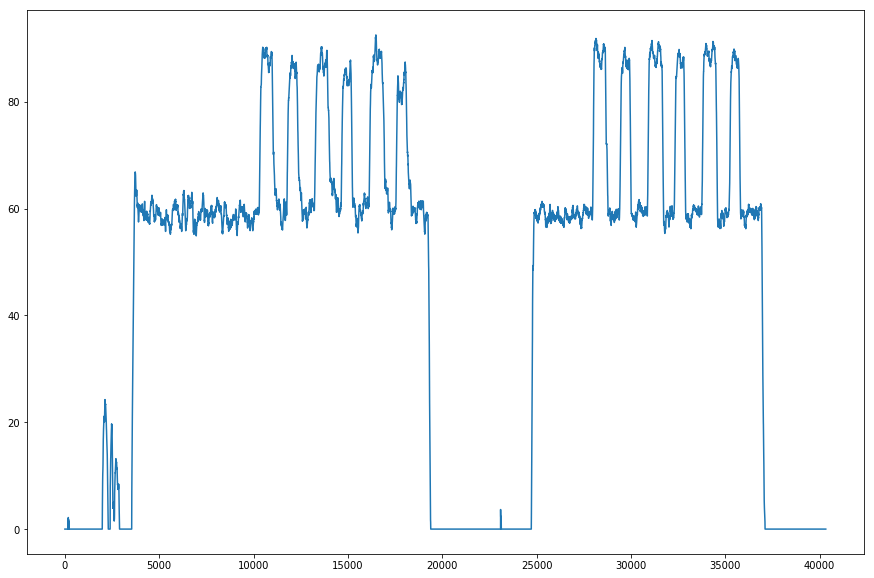

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
df_m.enhanced_speed.plot()
plt.show()

In [9]:
s = pd.Series(df_m.loc[df_m.enhanced_speed > 40].index.values)
print(s[s < 20000].max(), s[s > 20000].min())

19305 24784


In [10]:
left_1 = s.min()
righ_1 = s[s < 20000].max()
left_2 = s[s > 20000].min()
righ_2 = s.max()
print('Indeces are', str(left_1) + ':' + str(righ_1), 'and', str(left_2) + ':' + str(righ_2))

Indeces are 3624:19305 and 24784:36965


Checking their positions and speed:

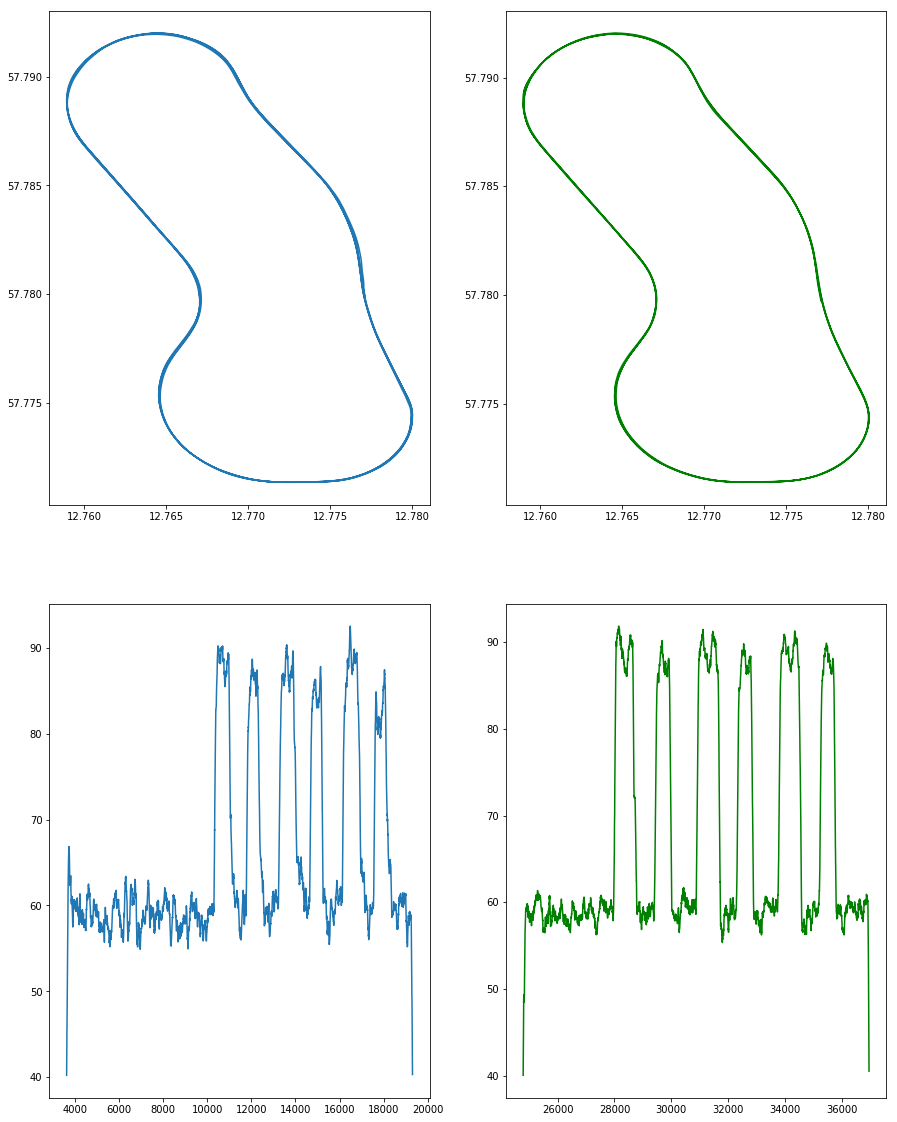

In [13]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 20)
ax[0, 0].plot(df_m.loc[left_1:righ_1, 'position_long'], df_m.loc[left_1:righ_1, 'position_lat'])
ax[0, 1].plot(df_m.loc[left_2:righ_2, 'position_long'], df_m.loc[left_2:righ_2, 'position_lat'], color='g')
ax[1, 0].plot(df_m.loc[left_1:righ_1, 'enhanced_speed'])
ax[1, 1].plot(df_m.loc[left_2:righ_2, 'enhanced_speed'], color='g')
plt.show()

Approximate time duration:

In [14]:
print('For the first one:')
print(df_m.loc[3624:19305, 'utc_timestamp'].min(), df_m.loc[3624:19305, 'utc_timestamp'].max())
print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(df_m.loc[3624:19305, 'utc_timestamp'].nunique()))))

For the first one:
2019-07-04 11:10:35+00:00 2019-07-04 11:36:43+00:00
Length is 00:26:09


In [15]:
print('For the second one:')
print(df_m.loc[24784:36965, 'utc_timestamp'].min(), df_m.loc[24784:36965, 'utc_timestamp'].max())
print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(df_m.loc[24784:36965, 'utc_timestamp'].nunique()))))

For the second one:
2019-07-04 11:45:51+00:00 2019-07-04 12:06:09+00:00
Length is 00:20:19


Corresponding signals from the D-GPS:

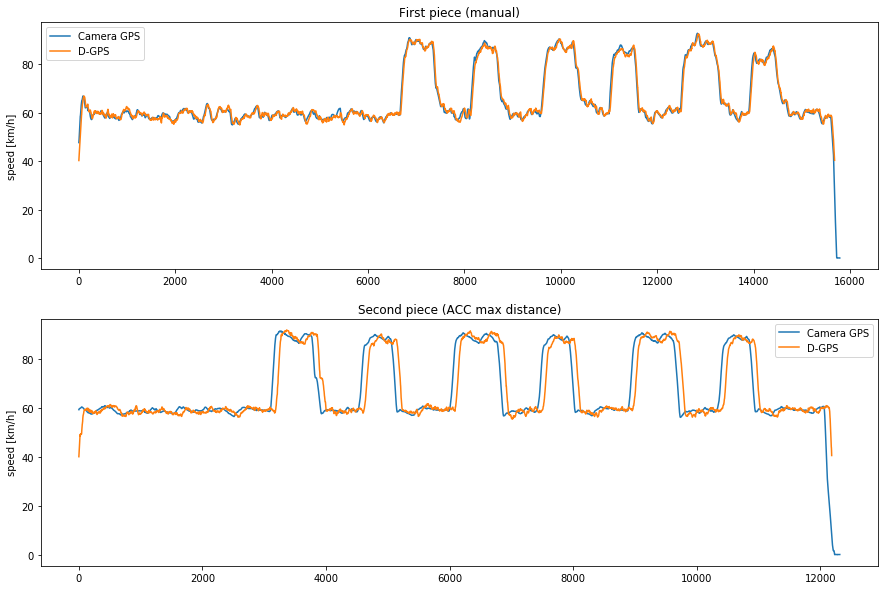

In [16]:
df_1 = pd.read_csv('../data/raw/labeled/Thursday 1st manual.csv')
df_2 = pd.read_csv('../data/raw/labeled/Thursday ACC max dist.csv')

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 10)
ax[0].plot(df_1['Velocity(m/s) Tesla azd'].index, df_1['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax[0].plot(list(range(righ_1 - left_1 +1)), df_m.loc[left_1:righ_1, 'enhanced_speed'])
ax[0].set_title('First piece (manual)')
ax[0].set_ylabel('speed [km/h]')
ax[0].legend(['Camera GPS', 'D-GPS'])
ax[1].plot(df_2['Velocity(m/s) Tesla azd'].index, df_2['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax[1].plot(list(range(righ_2 - left_2 +1)), df_m.loc[left_2:righ_2, 'enhanced_speed'])
ax[1].set_title('Second piece (ACC max distance)')
ax[1].set_ylabel('speed [km/h]')
ax[1].legend(['Camera GPS', 'D-GPS'])
plt.show()

## Mercedes `.fit` vs videos

We proceed in a similar way for the Mercedes:

In [17]:
path = '../data/tmp/mercedes/'
files = os.listdir(path)
csv_files = [file for file in files if file[-4:].lower() == '.csv']
for file in csv_files:
    tmp = pd.read_csv(path + file)
    display(tmp.head(2))
    print(file, '-> shape =', tmp.shape, '\nFrom', tmp.utc_timestamp.min(), 'to', tmp.utc_timestamp.max())
    print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(tmp.utc_timestamp.nunique()))))
    print('------------------------------------------------------------')

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:15:22+00:00,975,57.778994,12.777424,178.8,9.576,"(-1.18, 2.38, -0.44)"
1,2019-07-04 12:15:22+00:00,75,57.778997,12.777412,178.8,9.000,"(-1.01, 2.28, -0.44)"


2019-07-04-14-15-16.csv -> shape = (9505, 7) 
From 2019-07-04 12:15:22+00:00 to 2019-07-04 12:31:12+00:00
Length is 00:15:51
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:08:05+00:00,556,57.777482,12.779583,204.6,11.0808,"(-1.61, 2.62, 0.2)"
1,2019-07-04 11:08:05+00:00,656,57.777487,12.779580,204.6,11.0484,"(-1.56, 2.64, 0.2)"


2019-07-04-13-08-00.csv -> shape = (21589, 7) 
From 2019-07-04 11:08:05+00:00 to 2019-07-04 11:44:03+00:00
Length is 00:35:59
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-13-01-37.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:58:54+00:00,590,57.778776,12.777524,182.4,0.0,"(0.0, 0.13, 0.0)"
1,2019-07-04 13:58:54+00:00,690,57.778773,12.777521,182.4,0.0,"(0.0, 0.11, 0.0)"


2019-07-04-15-58-49.csv -> shape = (4679, 7) 
From 2019-07-04 13:58:54+00:00 to 2019-07-04 14:06:41+00:00
Length is 00:07:48
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-21-24-13.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:35:03+00:00,240,57.780994,12.776929,181.8,60.7680,"(-1.88, 16.77, 0.32)"
1,2019-07-04 13:35:03+00:00,340,57.781048,12.776945,181.6,61.5996,"(-2.0, 16.99, 0.04)"


2019-07-04-15-34-58.csv -> shape = (12132, 7) 
From 2019-07-04 13:35:03+00:00 to 2019-07-04 13:55:16+00:00
Length is 00:20:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-07-39-38.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:51:04+00:00,594,57.778992,12.777449,202.8,0.0,"(-0.27, -0.04, 0.07)"
1,2019-07-04 12:51:04+00:00,694,57.778997,12.777447,203.4,0.0,"(-0.21, -0.03, 0.06)"


2019-07-04-14-50-58.csv -> shape = (9456, 7) 
From 2019-07-04 12:51:04+00:00 to 2019-07-04 13:06:49+00:00
Length is 00:15:46
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:00:48+00:00,40,57.776649,12.778317,10.4,3.978,"(-0.16, -1.09, -1.13)"
1,2019-07-04 11:00:48+00:00,140,57.776935,12.778688,88.8,0.000,"(0.0, 0.0, 0.0)"


2019-07-04-13-00-41.csv -> shape = (353, 7) 
From 2019-07-04 11:00:48+00:00 to 2019-07-04 11:01:23+00:00
Length is 00:00:36
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:14:38+00:00,195,57.780601,12.777052,165.0,76.0320,"(-0.53, 21.11, 0.04)"
1,2019-07-04 13:14:38+00:00,295,57.780629,12.777048,164.2,77.2488,"(-0.84, 21.44, 0.04)"


2019-07-04-15-14-33.csv -> shape = (9801, 7) 
From 2019-07-04 13:14:38+00:00 to 2019-07-04 13:30:58+00:00
Length is 00:16:21
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:44:55+00:00,998,57.779030,12.777719,194.6,0.0,"(0.0, 0.19, 0.0)"
1,2019-07-04 11:44:55+00:00,98,57.779031,12.777717,194.6,0.0,"(0.0, 0.17, 0.0)"


2019-07-04-13-44-50.csv -> shape = (13225, 7) 
From 2019-07-04 11:44:55+00:00 to 2019-07-04 12:06:57+00:00
Length is 00:22:03
------------------------------------------------------------


```
                 video                            duration                   CSV file                  comments
                
'../data/raw/day 4 b/DCIM/100_VIRB/V0810084.GLV' -> 00:03 <- ../data/tmp/mercedes/?                   bad video
'../data/raw/day 4 b/DCIM/100_VIRB/V0820085.GLV' -> 00:00 <- ../data/tmp/mercedes/?                   bad video
'../data/raw/day 4 b/DCIM/100_VIRB/V0830086.GLV' -> 30:00 <- ../data/tmp/mercedes/2019-07-04-13-08-00.csv first
'../data/raw/day 4 b/DCIM/100_VIRB/V0830087.GLV' -> 05:58 <- ../data/tmp/mercedes/2019-07-04-13-08-00.csv  last
'../data/raw/day 4 b/DCIM/100_VIRB/V0840088.GLV' -> 22:01 <- ../data/tmp/mercedes/2019-07-04-13-44-50.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0850089.GLV' -> 15:50 <- ../data/tmp/mercedes/2019-07-04-14-15-16.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0860090.GLV' -> 15:45 <- ../data/tmp/mercedes/2019-07-04-14-50-58.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0870091.GLV' -> 16:19 <- ../data/tmp/mercedes/2019-07-04-15-14-33.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0880092.GLV' -> 20:12 <- ../data/tmp/mercedes/2019-07-04-15-34-58.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0890093.GLV' -> 07:47 <- ../data/tmp/mercedes/2019-07-04-15-58-49.csv
```

First thing that we notice is that three `.csv` files are empty:
- `2019-07-04-13-01-37.csv`
- `2019-07-04-21-24-13.csv`
- `2019-07-04-07-39-38.csv`

Also, one `.fit` file is not used:
- `2019-07-04-13-00-41.csv`: ~36s long.

In [18]:
# Total duration usable video:
time.strftime('%H:%M:%S', time.gmtime(30 * 60 +  0 + \
                                       5 * 60 + 58 + \
                                      22 * 60 +  1 + \
                                      15 * 60 + 50 + \
                                      15 * 60 + 45 + \
                                      16 * 60 + 19 + \
                                      20 * 60 + 12 + \
                                       7 * 60 + 47))

'02:13:52'

So adding up the usable video of the Tesla and the Mercedes:

In [19]:
print((2 + 1) * 3600 + (13 + 7) * 60 + 52 + 54, 'seconds in total')

12106 seconds in total


# Correspondance `.fit` vs D-GPS

We need to match the following data from D-GPS (and U-blox) with the `.fit` files:

In [20]:
!ls -lah ../data/raw/labeled/T*

-rw-r--r-- 1 jovyan users 8.3M Jul 22 16:10 '../data/raw/labeled/Thursday 1st manual.csv'
-rw-r--r-- 1 jovyan users 6.5M Jul 22 16:10 '../data/raw/labeled/Thursday ACC max dist.csv'
-rw-r--r-- 1 jovyan users 4.5M Jul 22 16:10 '../data/raw/labeled/Thursday ACC min dist 50 100.csv'
-rw-r--r-- 1 jovyan users 6.0M Jul 22 16:10 '../data/raw/labeled/Thursday ACC min dist 50 100 inverse 2.csv'
-rw-r--r-- 1 jovyan users 5.6M Jul 22 16:10 '../data/raw/labeled/Thursday ACC min dist 50 100 inverse small perturb.csv'
-rw-r--r-- 1 jovyan users 4.4M Jul 22 16:10 '../data/raw/labeled/Thursday ACC min dist 50 100 with small perts.csv'
-rw-r--r-- 1 jovyan users 4.8M Jul 22 16:10 '../data/raw/labeled/Thursday ACC min dist 60 90.csv'
-rw-r--r-- 1 jovyan users 5.9M Jul 22 16:10 '../data/raw/labeled/Thursday manual 50 100 inverse.csv'


## Computing the UTC time

Three things to note:
- The `Time(s)` column in the CSV files is in tenths of seconds, so it needs to be converted into UTC times.
- The data from the CSV files matches the time of the U-blox, which is Italian: UTC+2.
- Aside from that 2h difference, the time from the CSV files is ~17 seconds ahead, so we also introduce this correction.

Lets see it with an example:

In [21]:
df = pd.read_csv('../data/raw/labeled/Thursday 1st manual.csv', usecols=range(1, 52))
df.head()

,Time(s),Velocity(m/s) A8 azd,metric A8 azd,E A8 azd,N A8 azd,U A8 azd,Velocity(m/s) A6 azd,metric A6 azd,E A6 azd,N A6 azd,...,Velocity(m/s) Mercedes ubx,metric Mercedes ubx,E Mercedes ubx,N Mercedes ubx,U Mercedes ubx,Velocity(m/s) Tesla ubx,metric Tesla ubx,E Tesla ubx,N Tesla ubx,U Tesla ubx
0,47454.4,15.890000,0.056250,450.136471,-74.207260,-0.063761,8.040909,0.05,466.675158,-200.146490,...,7.513048,0.15,470.350006,-221.643246,0.601269,13.137514,0.4,453.637679,-124.762847,-3.339151
1,47454.5,15.911468,0.098843,449.985857,-72.622055,-0.064003,8.146667,0.10,466.537702,-199.349025,...,7.544117,0.15,470.185171,-220.916189,0.599881,13.216948,0.4,453.493787,-123.496116,-3.339116
2,47454.6,15.940950,0.094656,449.834809,-71.034285,-0.064245,8.252727,0.10,466.399397,-198.540512,...,7.584000,0.15,470.024469,-220.178019,0.598965,13.302654,0.4,453.352484,-122.214220,-3.339081
3,47454.7,15.967778,0.100000,449.683554,-69.444392,-0.064498,8.364444,0.10,466.260394,-197.721885,...,7.632244,0.20,469.867197,-219.429657,0.598423,13.394239,0.4,453.213417,-120.917328,-3.339046
4,47454.8,15.995863,0.100659,449.532826,-67.850841,-0.064731,8.478182,0.10,466.120170,-196.891807,...,7.688395,0.25,469.712653,-218.672025,0.598156,13.491306,0.4,453.076232,-119.605608,-3.339012


Convert to UTC, and substract 2h:

In [22]:
df['utc_timestamp'] = pd.to_datetime(df['Time(s)'], unit='s', origin='2019-07-04') - pd.to_timedelta(2, unit='h')
cols = df.columns.tolist()
df = df[cols[-1:] + cols[:-1]]
df.head()

,utc_timestamp,Time(s),Velocity(m/s) A8 azd,metric A8 azd,E A8 azd,N A8 azd,U A8 azd,Velocity(m/s) A6 azd,metric A6 azd,E A6 azd,...,Velocity(m/s) Mercedes ubx,metric Mercedes ubx,E Mercedes ubx,N Mercedes ubx,U Mercedes ubx,Velocity(m/s) Tesla ubx,metric Tesla ubx,E Tesla ubx,N Tesla ubx,U Tesla ubx
0,2019-07-04 11:10:54.400000095,47454.4,15.890000,0.056250,450.136471,-74.207260,-0.063761,8.040909,0.05,466.675158,...,7.513048,0.15,470.350006,-221.643246,0.601269,13.137514,0.4,453.637679,-124.762847,-3.339151
1,2019-07-04 11:10:54.500000000,47454.5,15.911468,0.098843,449.985857,-72.622055,-0.064003,8.146667,0.10,466.537702,...,7.544117,0.15,470.185171,-220.916189,0.599881,13.216948,0.4,453.493787,-123.496116,-3.339116
2,2019-07-04 11:10:54.599999905,47454.6,15.940950,0.094656,449.834809,-71.034285,-0.064245,8.252727,0.10,466.399397,...,7.584000,0.15,470.024469,-220.178019,0.598965,13.302654,0.4,453.352484,-122.214220,-3.339081
3,2019-07-04 11:10:54.700000048,47454.7,15.967778,0.100000,449.683554,-69.444392,-0.064498,8.364444,0.10,466.260394,...,7.632244,0.20,469.867197,-219.429657,0.598423,13.394239,0.4,453.213417,-120.917328,-3.339046
4,2019-07-04 11:10:54.799999952,47454.8,15.995863,0.100659,449.532826,-67.850841,-0.064731,8.478182,0.10,466.120170,...,7.688395,0.25,469.712653,-218.672025,0.598156,13.491306,0.4,453.076232,-119.605608,-3.339012


Do the same for another CSV:

In [23]:
df_acc = pd.read_csv('../data/raw/labeled/Thursday ACC max dist.csv')
df_acc['utc_timestamp'] = pd.to_datetime(df_acc['Time(s)'], unit='s', origin='2019-07-04') - pd.to_timedelta(2, unit='h')
cols = df_acc.columns.tolist()
df_acc = df_acc[cols[-1:] + cols[:-1]]
df_acc.head()

,utc_timestamp,Unnamed: 0,Time(s),Velocity(m/s) A8 azd,metric A8 azd,E A8 azd,N A8 azd,U A8 azd,Velocity(m/s) A6 azd,metric A6 azd,...,Velocity(m/s) Mercedes ubx,metric Mercedes ubx,E Mercedes ubx,N Mercedes ubx,U Mercedes ubx,Velocity(m/s) Tesla ubx,metric Tesla ubx,E Tesla ubx,N Tesla ubx,U Tesla ubx
0,2019-07-04 11:46:17.299999952,0,49577.3,16.512222,0.05,445.136024,-22.847074,-0.071966,11.853333,0.05,...,11.440313,0.350000,461.988868,-171.921883,0.589569,16.049801,0.2,448.615362,-65.617246,-3.337912
1,2019-07-04 11:46:17.400000095,1,49577.4,16.521818,0.10,444.980089,-21.200165,-0.072223,11.892727,0.10,...,11.417815,0.350000,461.841183,-170.813081,0.589069,16.183501,0.2,448.469970,-63.840039,-3.337885
2,2019-07-04 11:46:17.500000000,2,49577.5,16.528889,0.10,444.823848,-19.553042,-0.072482,11.935556,0.10,...,11.395000,0.350000,461.689185,-169.704366,0.588618,16.296005,0.2,448.325707,-62.084355,-3.337857
3,2019-07-04 11:46:17.599999905,3,49577.6,16.536364,0.10,444.667547,-17.904951,-0.072695,11.979091,0.10,...,11.371971,0.392857,461.533370,-168.595821,0.588211,16.389132,0.2,448.182397,-60.348273,-3.337831
4,2019-07-04 11:46:17.700000048,4,49577.7,16.543333,0.10,444.511475,-16.256906,-0.072887,12.018889,0.10,...,11.348829,0.435714,461.374231,-167.487532,0.587843,16.464699,0.2,448.039865,-58.629875,-3.337805


Add the ms of the `.fit` files to the UTC time:

In [24]:
df_m['utc_timestamp'] = pd.to_datetime(df_m.utc_timestamp) + pd.to_timedelta(df_m.timestamp_ms, unit='ms')
df_m.drop(columns='timestamp_ms', axis=1, inplace=True)
df_m.head()

,utc_timestamp,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:04:33.068,57.777415,12.779599,186.2,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 11:04:33.168,57.777415,12.779600,186.2,0.0,"(-0.01, 0.0, 0.0)"
2,2019-07-04 11:04:33.268,57.777414,12.779601,186.2,0.0,"(-0.01, 0.0, 0.0)"
3,2019-07-04 11:04:33.368,57.777414,12.779602,186.2,0.0,"(-0.01, 0.0, 0.0)"
4,2019-07-04 11:04:33.468,57.777414,12.779602,186.0,0.0,"(-0.01, 0.0, 0.0)"


Plot them together (with the 17 seconds difference) we see it matches:

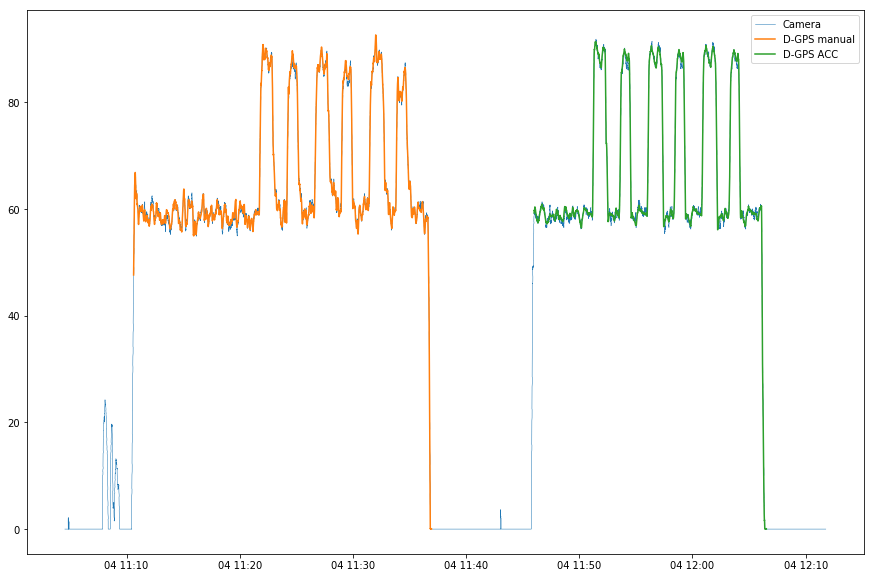

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(df_m.utc_timestamp, df_m.enhanced_speed, lw=0.5)
ax.plot(df.utc_timestamp - pd.to_timedelta(17, unit='s'), df['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax.plot(df_acc.utc_timestamp - pd.to_timedelta(17, unit='s'), df_acc['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax.legend(['Camera', 'D-GPS manual', 'D-GPS ACC'])
plt.show()

Print the duration of the previous DGPS signals:

In [26]:
print(df.utc_timestamp.max() - df.utc_timestamp.min())
print(df_acc.utc_timestamp.max() - df_acc.utc_timestamp.min())

0 days 00:26:18.899999
0 days 00:20:31.200000


## Matching the files

Taking advantage of the UTC times that we can compute, we are going to match the CSV files with the camera data (`.fit`).

In [27]:
# Files that are empty or do not match a video:

tesla_blacklist= ['2019-07-04-20-55-34.csv',
                  '2019-07-04-20-58-39.csv',
                  '2019-07-04-20-58-48.csv',]
#                  '2019-07-04-13-04-32.csv']

merc_blacklist = ['2019-07-04-13-01-37.csv',
                  '2019-07-04-21-24-13.csv',
                  '2019-07-04-07-39-38.csv',
                  '2019-07-04-13-00-41.csv']

dgps_blacklist = [] #['Thursday ACC max dist.csv',
                    # 'Thursday 1st manual.csv']

In [28]:
def adjust_time(df, hours=2, seconds=17):
    '''
    Convert the times of the CSV files to UTC.
    '''
    df['utc_timestamp'] = pd.to_datetime(df['Time(s)'], unit='s', origin='2019-07-04') - \
                          pd.to_timedelta(hours, unit='h') - pd.to_timedelta(seconds, unit='s')
    cols = df.columns.tolist()
    df = df[cols[-1:] + cols[:-1]]
    return df

def convert_to_time(df):
    '''
    Transform the utc_timestamp column of the .fit files to datetime format, and add the ms.
    '''
    df['utc_timestamp'] = pd.to_datetime(df.utc_timestamp) + \
                          pd.to_timedelta(df.timestamp_ms, unit='ms')
    df.drop(columns='timestamp_ms', axis=1, inplace=True)
    return df

By inspecting the times and shape of the next plot, we can match the files:

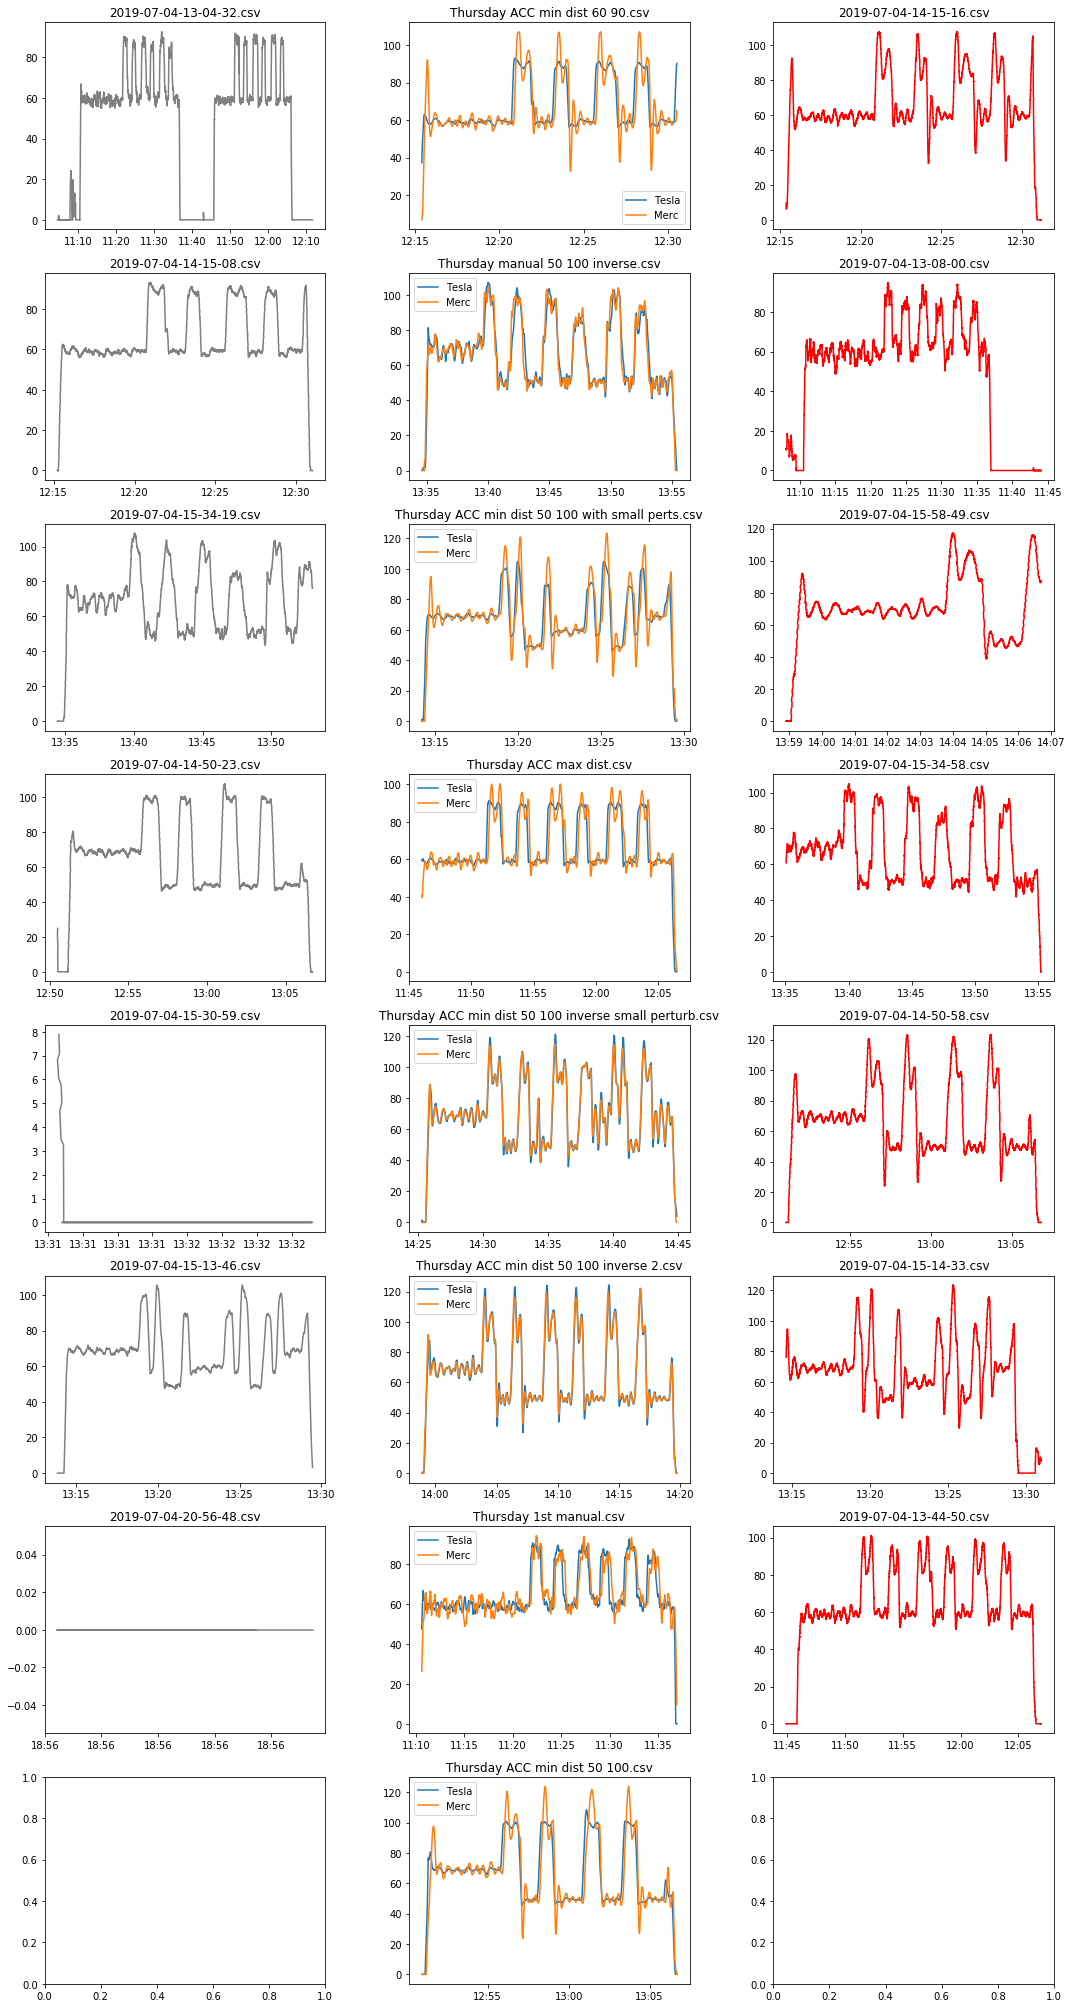

In [33]:
path_tesla = '../data/tmp/tesla/'
path_merc = '../data/tmp/mercedes/'
path_dgps = '../data/raw/labeled/'
tesla_files = [file for file in os.listdir(path_tesla) if file not in tesla_blacklist]
merc_files = [file for file in os.listdir(path_merc) if file not in merc_blacklist]
dgps_files = [file for file in os.listdir(path_dgps) if file[0].lower() == 't' and file not in dgps_blacklist]

fig, ax = plt.subplots(8, 3)
fig.set_size_inches(15, 28)
for idx in range(len(tesla_files)):
    df_tesla = convert_to_time(pd.read_csv(path_tesla + tesla_files[idx]))
    df_merc = convert_to_time(pd.read_csv(path_merc + merc_files[idx]))
    df_dgps = adjust_time(pd.read_csv(path_dgps + dgps_files[idx]))
    df_dgps.drop(columns='Unnamed: 0', axis=1, inplace=True)
    # Tesla camera plots
    ax[idx, 0].plot(df_tesla.utc_timestamp, df_tesla.enhanced_speed, color='grey')
    ax[idx, 0].set_title(tesla_files[idx])
    ax[idx, 0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    # D-GPS plots
    ax[idx, 1].plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Tesla azd'] * 3600 / 1000)
    ax[idx, 1].plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Mercedes azd'] * 3600 / 1000)
    ax[idx, 1].legend(['Tesla', 'Merc'])
    ax[idx, 1].set_title(dgps_files[idx])
    ax[idx, 1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    # Mercedes camera plots
    ax[idx, 2].plot(df_merc.utc_timestamp, df_merc.enhanced_speed, color='r')
    ax[idx, 2].set_title(merc_files[idx])
    ax[idx, 2].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

df_dgps = adjust_time(pd.read_csv(path_dgps + dgps_files[7]))
ax[7, 1].plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax[7, 1].plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Mercedes azd'] * 3600 / 1000)
ax[7, 1].legend(['Tesla', 'Merc'])
ax[7, 1].set_title(dgps_files[7])
ax[7, 1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

plt.tight_layout()
plt.show()

With the previous plot, we can define this dataframe:

In [35]:
tesla_ord = ['2019-07-04-13-04-32.csv',
             '2019-07-04-13-04-32.csv',
             '2019-07-04-14-15-08.csv',
             '2019-07-04-15-34-19.csv',
             '2019-07-04-14-50-23.csv',
             '2019-07-04-15-30-59.csv',
             '2019-07-04-15-13-46.csv',
             '2019-07-04-20-56-48.csv',
              np.nan,
              np.nan]

dgps_ord = ['Thursday 1st manual.csv',
            'Thursday ACC max dist.csv',                   
            'Thursday ACC min dist 60 90.csv',             
            'Thursday manual 50 100 inverse.csv',          
            'Thursday ACC min dist 50 100.csv',            
             np.nan,                                           
            'Thursday ACC min dist 50 100 with small perts.csv', 
             np.nan,                                           
            'Thursday ACC min dist 50 100 inverse small perturb.csv',    
            'Thursday ACC min dist 50 100 inverse 2.csv']            

merc_ord = ['2019-07-04-13-08-00.csv',
            '2019-07-04-13-44-50.csv',
            '2019-07-04-14-15-16.csv',
            '2019-07-04-15-34-58.csv',
            '2019-07-04-14-50-58.csv',
             np.nan,
            '2019-07-04-15-14-33.csv',
             np.nan,
             np.nan,
            '2019-07-04-15-58-49.csv' ]

df_ord = pd.DataFrame({'dgps': dgps_ord, 
                       'tesla': tesla_ord, 
                       'mercedes': merc_ord})
df_ord

,dgps,tesla,mercedes
0,Thursday 1st manual.csv,2019-07-04-13-04-32.csv,2019-07-04-13-08-00.csv
1,Thursday ACC max dist.csv,2019-07-04-13-04-32.csv,2019-07-04-13-44-50.csv
2,Thursday ACC min dist 60 90.csv,2019-07-04-14-15-08.csv,2019-07-04-14-15-16.csv
3,Thursday manual 50 100 inverse.csv,2019-07-04-15-34-19.csv,2019-07-04-15-34-58.csv
4,Thursday ACC min dist 50 100.csv,2019-07-04-14-50-23.csv,2019-07-04-14-50-58.csv
5,NaN,2019-07-04-15-30-59.csv,NaN
6,Thursday ACC min dist 50 100 with small perts.csv,2019-07-04-15-13-46.csv,2019-07-04-15-14-33.csv
7,NaN,2019-07-04-20-56-48.csv,NaN
8,Thursday ACC min dist 50 100 inverse small per...,NaN,NaN
9,Thursday ACC min dist 50 100 inverse 2.csv,NaN,2019-07-04-15-58-49.csv


Lets check that the match is correct for all rows:

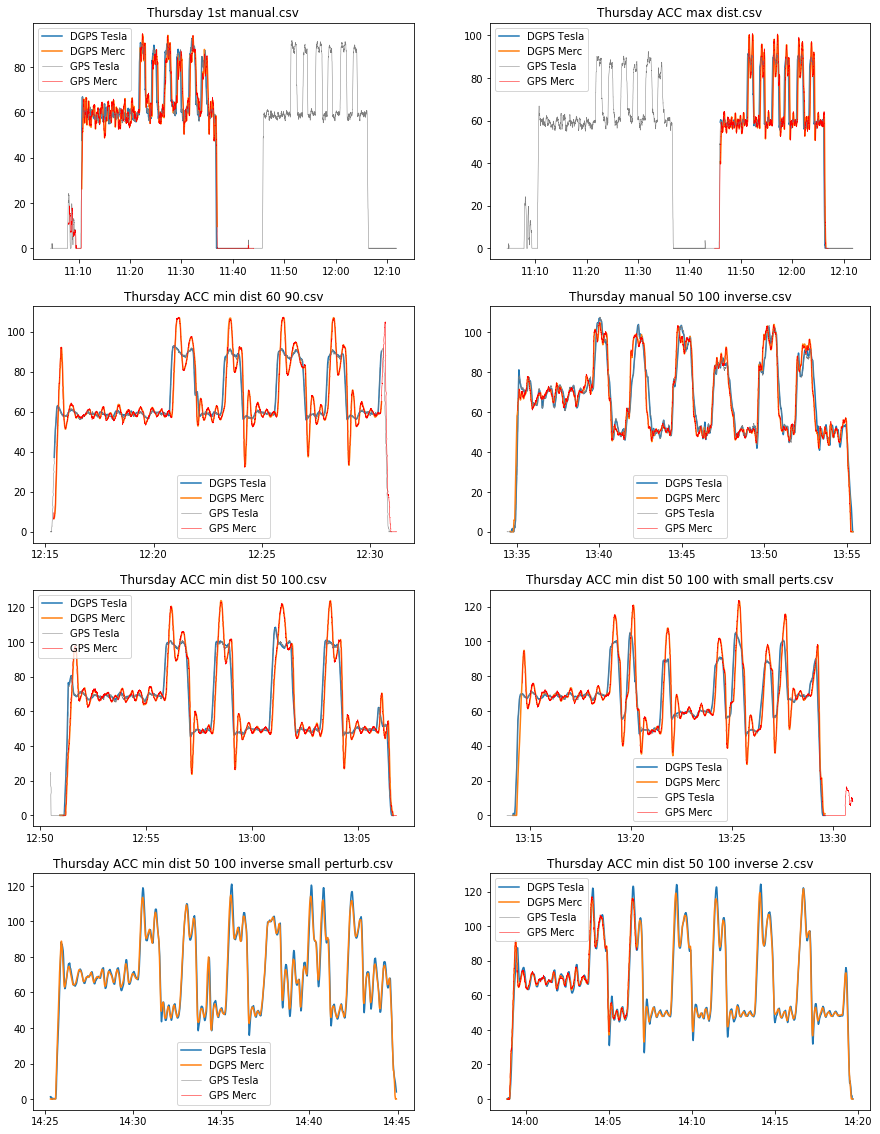

In [38]:
df_aux = df_ord[~df_ord.dgps.isna()]
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15, 20)

for idx, ax in enumerate(axs.reshape(-1)):
    df_dgps = adjust_time(pd.read_csv(path_dgps + df_aux.iloc[idx, 0]))
    df_dgps.drop(columns='Unnamed: 0', axis=1, inplace=True)
    if os.path.exists(path_tesla + str(df_aux.iloc[idx, 1])):
        df_tesla = convert_to_time(pd.read_csv(path_tesla + df_aux.iloc[idx, 1]))
    else:
        df_tesla = pd.DataFrame(columns=['utc_timestamp', 'enhanced_speed'])
    if os.path.exists(path_merc + str(df_aux.iloc[idx, 2])):
        df_merc = convert_to_time(pd.read_csv(path_merc + df_aux.iloc[idx, 2]))
    else:
        df_merc = pd.DataFrame(columns=['utc_timestamp', 'enhanced_speed'])
        
    ax.plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Tesla azd'] * 3600 / 1000)
    ax.plot(df_dgps.utc_timestamp, df_dgps['Velocity(m/s) Mercedes azd'] * 3600 / 1000)
    ax.plot(df_tesla.utc_timestamp, df_tesla.enhanced_speed, color='grey', lw=0.5)  
    ax.plot(df_merc.utc_timestamp, df_merc.enhanced_speed, color='r', lw=0.5)
    ax.set_title(df_aux.iloc[idx, 0])
    ax.legend(['DGPS Tesla', 'DGPS Merc', 'GPS Tesla', 'GPS Merc'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

plt.show()

## Adding the videos to the matching table

Using the information we obtained in the first section, we can include the video names to the table with the matching:

In [40]:
tesla_videos = ['V0350035.GLV',   # 0
                'V0360037.GLV',   # 1
                'V0380039.GLV',   # 2
                'V0420043.GLV',   # 3
                'V0390040.GLV',   # 4
                'V0410042.GLV',   # 5
                'V0400041.GLV',   # 6
                np.nan,
                np.nan, 
                np.nan]

mercedes_videos = ['V0830086.GLV+V0830087.GLV',  # 0
                   'V0840088.GLV',               # 1
                   'V0850089.GLV',               # 2
                   'V0880092.GLV',               # 3
                   'V0860090.GLV',               # 4
                   np.nan,
                   'V0870091.GLV',               # 6
                   np.nan,
                   np.nan, 
                   'V0890093.GLV']               # 9

df_ord['tesla_videos'] = tesla_videos
df_ord['mercedes_videos'] = mercedes_videos
df_ord.to_csv('../data/tmp/merged/files_matching.csv', index=False)
df_ord

,dgps,tesla,mercedes,tesla_videos,mercedes_videos
0,Thursday 1st manual.csv,2019-07-04-13-04-32.csv,2019-07-04-13-08-00.csv,V0350035.GLV,V0830086.GLV+V0830087.GLV
1,Thursday ACC max dist.csv,2019-07-04-13-04-32.csv,2019-07-04-13-44-50.csv,V0360037.GLV,V0840088.GLV
2,Thursday ACC min dist 60 90.csv,2019-07-04-14-15-08.csv,2019-07-04-14-15-16.csv,V0380039.GLV,V0850089.GLV
3,Thursday manual 50 100 inverse.csv,2019-07-04-15-34-19.csv,2019-07-04-15-34-58.csv,V0420043.GLV,V0880092.GLV
4,Thursday ACC min dist 50 100.csv,2019-07-04-14-50-23.csv,2019-07-04-14-50-58.csv,V0390040.GLV,V0860090.GLV
5,NaN,2019-07-04-15-30-59.csv,NaN,V0410042.GLV,NaN
6,Thursday ACC min dist 50 100 with small perts.csv,2019-07-04-15-13-46.csv,2019-07-04-15-14-33.csv,V0400041.GLV,V0870091.GLV
7,NaN,2019-07-04-20-56-48.csv,NaN,NaN,NaN
8,Thursday ACC min dist 50 100 inverse small per...,NaN,NaN,NaN,NaN
9,Thursday ACC min dist 50 100 inverse 2.csv,NaN,2019-07-04-15-58-49.csv,NaN,V0890093.GLV


Checking the car order in all experiments:

In [42]:
pd.read_csv('../data/raw/labeled/vehicle_order.csv').set_index('filename')

,order,manual,A8,Mercedes,A6,Tesla,BMW
filename,,,,,,,
Friday 1st experiment.csv,3,0,1,2,5,4,3
Friday 2nd experiment.csv,3,0,1,2,5,4,3
Thursday 1st manual.csv,1,1,1,5,4,2,3
Thursday ACC max dist.csv,1,0,1,5,4,2,3
Thursday ACC min dist 50 100 inverse 2.csv,2,0,1,4,2,5,3
Thursday ACC min dist 50 100 inverse small perturb.csv,2,0,1,4,2,5,3
Thursday ACC min dist 50 100 with small perts.csv,1,0,1,5,4,2,3
Thursday ACC min dist 50 100.csv,1,0,1,5,4,2,3
Thursday ACC min dist 60 90.csv,1,0,1,5,4,2,3


1. Tesla videos:

```
       GPS data               Video     Duration  Car-in-front            D-GPS data

2019-07-04-13-04-32.csv -> V0350035.GLV -> 30:00 -> A8     -> Thursday 1st manual.csv
2019-07-04-13-04-32.csv -> V0360037.GLV -> 19:32 -> A8     -> Thursday ACC max dist.csv
2019-07-04-14-15-08.csv -> V0380039.GLV -> 15:44 -> A8     -> Thursday ACC min dist 60 90.csv
2019-07-04-14-50-23.csv -> V0390040.GLV -> 16:12 -> A8     -> Thursday ACC min dist 50 100.csv
2019-07-04-15-13-46.csv -> V0400041.GLV -> 15:33 -> A8     -> Thursday ACC min dist 50 100 with small perts.csv
2019-07-04-15-30-59.csv -> V0410042.GLV -> 01:49 -> Mercedes -> ?
2019-07-04-15-34-19.csv -> V0420043.GLV -> 18:36 -> Mercedes -> Thursday manual 50 100 inverse.csv
```

2. Mercedes videos:

```
       GPS data               Video     Duration  Car-in-front            D-GPS data

2019-07-04-13-08-00.csv -> V0830086.GLV -> 30:00 -> A6  -> Thursday 1st manual.csv
2019-07-04-13-08-00.csv -> V0830087.GLV -> 05:58 -> A6  -> Thursday 1st manual.csv???
2019-07-04-13-44-50.csv -> V0840088.GLV -> 22:01 -> A6  -> Thursday ACC max dist.csv
2019-07-04-14-15-16.csv -> V0850089.GLV -> 15:50 -> A6  -> Thursday ACC min dist 60 90.csv
2019-07-04-14-50-58.csv -> V0860090.GLV -> 15:45 -> A6  -> Thursday ACC min dist 50 100.csv
2019-07-04-15-14-33.csv -> V0870091.GLV -> 16:19 -> A6  -> Thursday ACC min dist 50 100 with small perts.csv
2019-07-04-15-34-58.csv -> V0880092.GLV -> 20:12 -> BMW -> Thursday manual 50 100 inverse.csv
2019-07-04-15-58-49.csv -> V0890093.GLV -> 07:47 -> BMW -> Thursday ACC min dist 50 100 inverse 2.csv
```

# Putting everything together
## Merge files

In this section we will obtain the final dataset, combining the operations we have been exploring and explaining:
1. Take the D-GPS data (and U-blox data) and convert to UTC time (- 2h - 17s). Also convert speed to km/h and rename columns.
2. Take the `.fit` data and convert to UTC time (adding the ms, which are in a separate column). Rename columns.
3. Merge both data using the matching that we computed in the previous section and the UTC timestamps.

In [43]:
df_aux = df_ord[~df_ord.dgps.isna()]
df_aux

,dgps,tesla,mercedes,tesla_videos,mercedes_videos
0,Thursday 1st manual.csv,2019-07-04-13-04-32.csv,2019-07-04-13-08-00.csv,V0350035.GLV,V0830086.GLV+V0830087.GLV
1,Thursday ACC max dist.csv,2019-07-04-13-04-32.csv,2019-07-04-13-44-50.csv,V0360037.GLV,V0840088.GLV
2,Thursday ACC min dist 60 90.csv,2019-07-04-14-15-08.csv,2019-07-04-14-15-16.csv,V0380039.GLV,V0850089.GLV
3,Thursday manual 50 100 inverse.csv,2019-07-04-15-34-19.csv,2019-07-04-15-34-58.csv,V0420043.GLV,V0880092.GLV
4,Thursday ACC min dist 50 100.csv,2019-07-04-14-50-23.csv,2019-07-04-14-50-58.csv,V0390040.GLV,V0860090.GLV
6,Thursday ACC min dist 50 100 with small perts.csv,2019-07-04-15-13-46.csv,2019-07-04-15-14-33.csv,V0400041.GLV,V0870091.GLV
8,Thursday ACC min dist 50 100 inverse small per...,NaN,NaN,NaN,NaN
9,Thursday ACC min dist 50 100 inverse 2.csv,NaN,2019-07-04-15-58-49.csv,NaN,V0890093.GLV


In [44]:
def load_dgps(filepath):
    df_dgps = adjust_time(pd.read_csv(filepath), seconds=17)
    # Delete unnecessary column
    df_dgps.drop(columns='Unnamed: 0', axis=1, inplace=True)
    # Take the velocity columns and convert m/s -> km/h
    vel_cols = [c for c in df_dgps.columns if 'Velocity' in c]
    df_dgps.loc[:, vel_cols] = df_dgps.loc[:, vel_cols] * 3600 / 1000
    # Rename columns
    df_dgps.columns = rename_dgps_cols(df_dgps.columns.tolist())
    return df_dgps

def load_cam(filepath, car, dummy):
    if os.path.exists(filepath) and idx != 1:
        df = convert_to_time(pd.read_csv(filepath))
        df.columns = rename_cam_cols(df.columns.tolist(), car=car)
    # If there is no file, create dummy empty df
    else:
        df = dummy.copy()
    return df

def rename_dgps_cols(cols):
    # Change from Time(s) to time_s
    cols[1] = 'time_s'
    for i, c in enumerate(cols):
        # Change speed units
        if 'Velocity(m/s)' in c:
            cols[i] = c.replace('Velocity(m/s)', 'speed_km_h')
        # Replace whitespace by underscore
        cols[i] = cols[i].replace(' ', '_')
    return cols

def rename_cam_cols(cols, car='', device='gps'):
    for i, c in enumerate(cols[1:]):
        cols[i + 1] = c.split('_')[-1] + '_' + car + '_gps'
        if 'speed' in c:
            cols[i + 1] = cols[i + 1].replace('speed', 'speed_km_h')
    return cols

def merge_on_date(*dfs, field='utc_timestamp'):
    # Find min and max timestamps
    min_time, max_time = dfs[0][field].min(), dfs[0][field].max()
    for df in dfs:
        min_curr, max_curr = df[field].min(), df[field].max()
        if min_curr < min_time:
            min_time = min_curr
        if max_curr > max_time:
            max_time = max_curr
    rang = pd.date_range(start=min_time, end=max_time, freq='100ms')
    # Create a dataframe with the full time range for the passed dataframes
    df_merged = pd.DataFrame({field: rang})
    # And merge them all, in steps
    for df in dfs:
        df_merged = pd.merge_asof(df_merged, df.sort_values(field), on=[field], direction='nearest',
                                  tolerance=pd.Timedelta('0.1s'))
    return df_merged

In [45]:
out_path = '../data/tmp/merged/'
dummy = pd.DataFrame(columns=['utc_timestamp'])
dummy.utc_timestamp = pd.to_datetime(dummy.utc_timestamp)
df_full = pd.DataFrame()

# We process the first two rows separately because they are a special case:
# Load D-GPS data
df_dgps = pd.concat([load_dgps(filepath=path_dgps + df_aux.iloc[0, 0]),
                     load_dgps(filepath=path_dgps + df_aux.iloc[1, 0])])
# Load the camera data for the Tesla
df_tesla = load_cam(filepath=path_tesla + str(df_aux.iloc[0, 1]), car='Tesla', dummy=dummy)
# Load the camera data for the Mercedes
df_merc = pd.concat([load_cam(filepath=path_merc + str(df_aux.iloc[0, 2]), car='Mercedes', dummy=dummy),
                     load_cam(filepath=path_merc + str(df_aux.iloc[1, 2]), car='Mercedes', dummy=dummy)])
# Merge using the timestamp
df_merged = merge_on_date(df_dgps, df_tesla, df_merc)
df_merged.to_csv(out_path + 'Thursday 1st manual + ACC max dist.csv', index=False)
# Save in the full dataframe
df_full = pd.concat([df_full, df_merged], sort=False)

for idx in range(2, df_aux.shape[0]):
    # Load D-GPS data
    df_dgps = load_dgps(filepath=path_dgps + df_aux.iloc[idx, 0])
    # Load the camera data for the Tesla
    df_tesla = load_cam(filepath=path_tesla + str(df_aux.iloc[idx, 1]), car='Tesla', dummy=dummy)
    # Load the camera data for the Mercedes
    df_merc = load_cam(filepath=path_merc + str(df_aux.iloc[idx, 2]), car='Mercedes', dummy=dummy)
    # Merge using the timestamp
    df_merged = merge_on_date(df_dgps, df_tesla, df_merc)
    print('File:', df_aux.iloc[idx, 0])
    print('Initial shapes:', '\n\tD-GPS:', df_dgps.shape, 
                             '\n\tTesla:', df_tesla.shape, 
                             '\n\tMercedes:', df_merc.shape)
    print('Resulting shape:', df_merged.shape)
    print('--------------------------------')
    df_merged.to_csv(out_path + df_aux.iloc[idx, 0], index=False)
    # Save in the full dataframe
    df_full = pd.concat([df_full, df_merged], sort=False)
    
df_full.sort_values('utc_timestamp', inplace=True)
# Delete rows with no values
df_full = df_full.set_index('utc_timestamp').dropna(how='all', axis=0).reset_index()
df_full.to_csv(out_path + 'experiments_full.csv', index=False)

File: Thursday ACC min dist 60 90.csv
Initial shapes: 
	D-GPS: (9075, 52) 
	Tesla: (9456, 6) 
	Mercedes: (9505, 6)
Resulting shape: (9590, 62)
--------------------------------
File: Thursday manual 50 100 inverse.csv
Initial shapes: 
	D-GPS: (12453, 47) 
	Tesla: (11161, 6) 
	Mercedes: (12132, 6)
Resulting shape: (12570, 57)
--------------------------------
File: Thursday ACC min dist 50 100.csv
Initial shapes: 
	D-GPS: (9456, 47) 
	Tesla: (9737, 6) 
	Mercedes: (9456, 6)
Resulting shape: (9810, 57)
--------------------------------
File: Thursday ACC min dist 50 100 with small perts.csv
Initial shapes: 
	D-GPS: (9247, 47) 
	Tesla: (9344, 6) 
	Mercedes: (9801, 6)
Resulting shape: (10253, 57)
--------------------------------
File: Thursday ACC min dist 50 100 inverse small perturb.csv
Initial shapes: 
	D-GPS: (11777, 47) 
	Tesla: (0, 1) 
	Mercedes: (0, 1)
Resulting shape: (11776, 47)
--------------------------------
File: Thursday ACC min dist 50 100 inverse 2.csv
Initial shapes: 
	D-GPS: 

In [46]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106815 entries, 0 to 106814
Data columns (total 62 columns):
utc_timestamp              106815 non-null datetime64[ns]
time_s                     92605 non-null float64
speed_km_h_A8_azd          92605 non-null float64
metric_A8_azd              92605 non-null float64
E_A8_azd                   92605 non-null float64
N_A8_azd                   92605 non-null float64
U_A8_azd                   92605 non-null float64
speed_km_h_A6_azd          92605 non-null float64
metric_A6_azd              92605 non-null float64
E_A6_azd                   92605 non-null float64
N_A6_azd                   92605 non-null float64
U_A6_azd                   92605 non-null float64
speed_km_h_Mercedes_azd    92605 non-null float64
metric_Mercedes_azd        92605 non-null float64
E_Mercedes_azd             92605 non-null float64
N_Mercedes_azd             92605 non-null float64
U_Mercedes_azd             92605 non-null float64
speed_km_h_BMW_azd         9260

Quick check: plot speeds of D-GPS and GPS (in pieces).

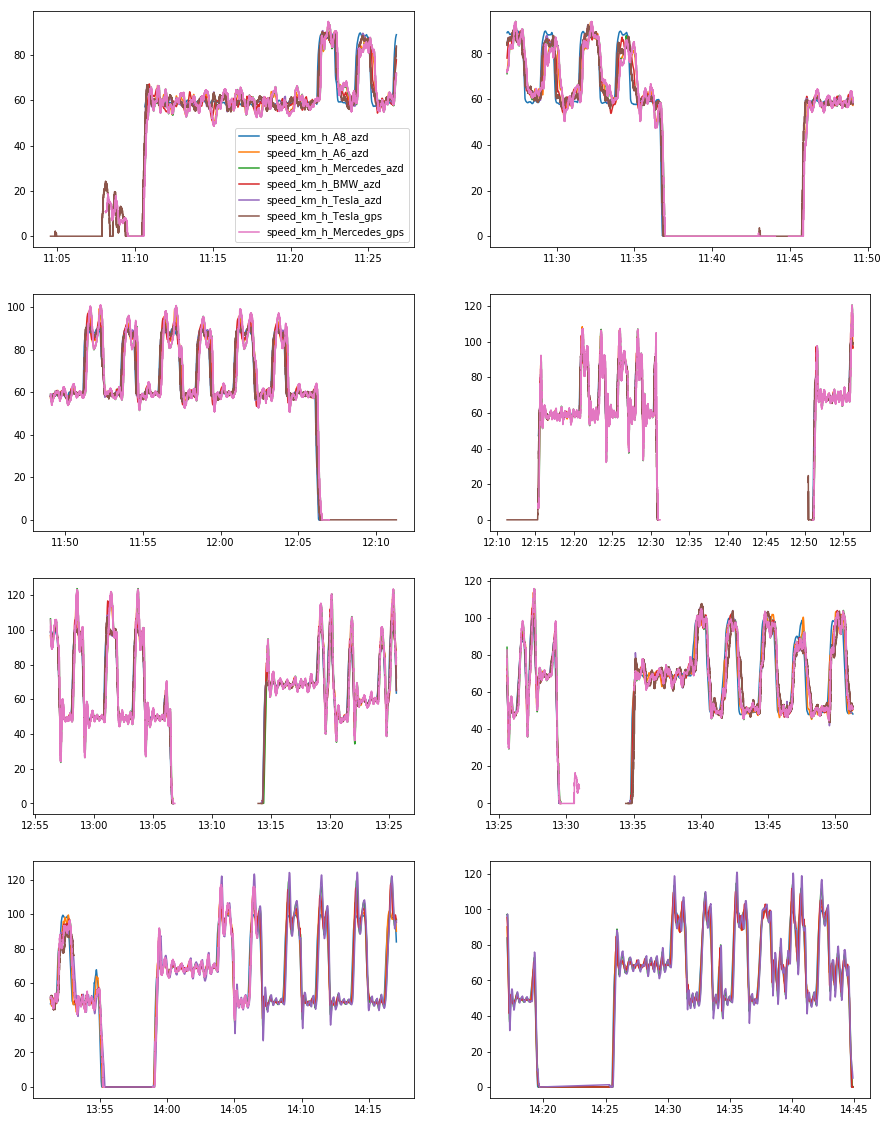

In [47]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15, 20)
steps = df_full.shape[0] // 8
cols = [c for c in df_full.columns if 'speed' in c and 'ubx' not in c]

for idx, ax in enumerate(axs.reshape(-1)):      
    ax.plot(df_full.loc[idx*steps:(idx+1)*steps, 'utc_timestamp'],
            df_full.loc[idx*steps:(idx+1)*steps, cols])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    if idx == 0:
        ax.legend(cols)

plt.show()

Take a closer look:

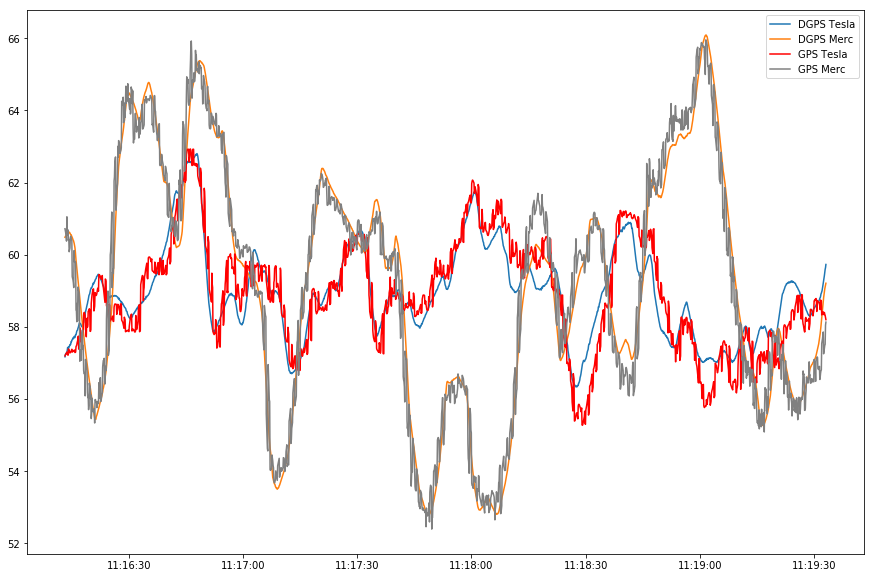

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(df_full.loc[7000:9000, 'utc_timestamp'], df_full.loc[7000:9000, 'speed_km_h_Tesla_azd'])
ax.plot(df_full.loc[7000:9000, 'utc_timestamp'], df_full.loc[7000:9000, 'speed_km_h_Mercedes_azd'])
ax.plot(df_full.loc[7000:9000, 'utc_timestamp'], df_full.loc[7000:9000, 'speed_km_h_Tesla_gps'], color='r')
ax.plot(df_full.loc[7000:9000, 'utc_timestamp'], df_full.loc[7000:9000, 'speed_km_h_Mercedes_gps'], color='grey')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.legend(['DGPS Tesla', 'DGPS Merc', 'GPS Tesla', 'GPS Merc'])
#plt.savefig('a.svg')
plt.show()

## Compute the relevant distances

Considering the vehicle order and the recorded videos we can compute the relevant distances between cars, using the ENU coordinates from the D-GPS:

In [81]:
df_full['dist_tesla_a8']       = np.sqrt((df_full['E_Tesla_azd'] - df_full['E_A8_azd'])**2 + \
                                         (df_full['N_Tesla_azd'] - df_full['N_A8_azd'])**2 + \
                                         (df_full['U_Tesla_azd'] - df_full['U_A8_azd'])**2)
df_full['dist_tesla_mercedes'] = np.sqrt((df_full['E_Tesla_azd'] - df_full['E_Mercedes_azd'])**2 + \
                                         (df_full['N_Tesla_azd'] - df_full['N_Mercedes_azd'])**2 + \
                                         (df_full['U_Tesla_azd'] - df_full['U_Mercedes_azd'])**2)
df_full['dist_mercedes_a6']    = np.sqrt((df_full['E_Mercedes_azd'] - df_full['E_A6_azd'])**2 + \
                                         (df_full['N_Mercedes_azd'] - df_full['N_A6_azd'])**2 + \
                                         (df_full['U_Mercedes_azd'] - df_full['U_A6_azd'])**2)
df_full['dist_mercedes_bmw']   = np.sqrt((df_full['E_Mercedes_azd'] - df_full['E_BMW_azd'])**2 + \
                                         (df_full['N_Mercedes_azd'] - df_full['N_BMW_azd'])**2 + \
                                         (df_full['U_Mercedes_azd'] - df_full['U_BMW_azd'])**2)

Quick plot to check distance ranges:

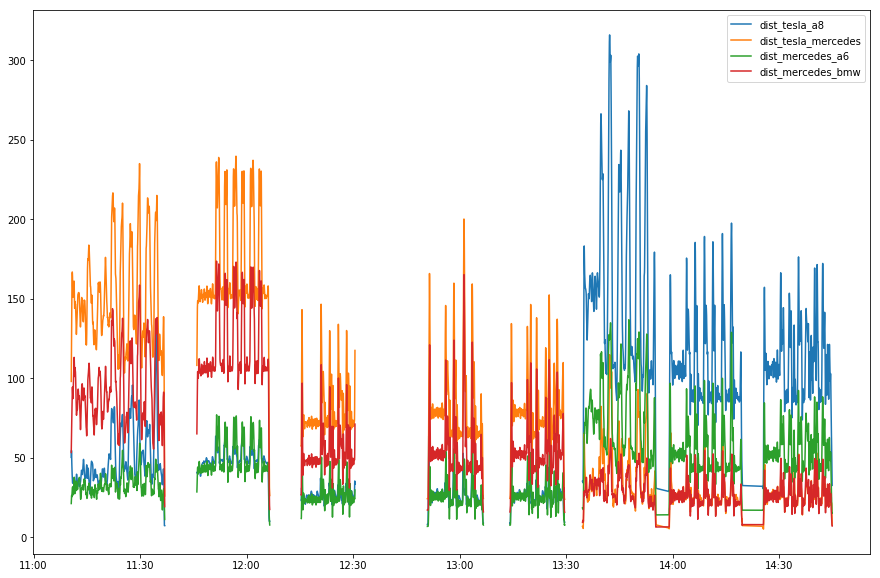

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(df_full.utc_timestamp, df_full.dist_tesla_a8)
ax.plot(df_full.utc_timestamp, df_full.dist_tesla_mercedes)
ax.plot(df_full.utc_timestamp, df_full.dist_mercedes_a6)
ax.plot(df_full.utc_timestamp, df_full.dist_mercedes_bmw)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.legend(['dist_tesla_a8', 'dist_tesla_mercedes', 'dist_mercedes_a6', 'dist_mercedes_bmw'])
plt.show()

## Subset the merged data

In [430]:
df_aux

,dgps,tesla,mercedes,tesla_videos,mercedes_videos
0,Thursday 1st manual.csv,2019-07-04-13-04-32.csv,2019-07-04-13-08-00.csv,V0350035.GLV,V0830086.GLV+V0830087.GLV
1,Thursday ACC max dist.csv,2019-07-04-13-04-32.csv,2019-07-04-13-44-50.csv,V0360037.GLV,V0840088.GLV
2,Thursday ACC min dist 60 90.csv,2019-07-04-14-15-08.csv,2019-07-04-14-15-16.csv,V0380039.GLV,V0850089.GLV
3,Thursday manual 50 100 inverse.csv,2019-07-04-15-34-19.csv,2019-07-04-15-34-58.csv,V0420043.GLV,V0880092.GLV
4,Thursday ACC min dist 50 100.csv,2019-07-04-14-50-23.csv,2019-07-04-14-50-58.csv,V0390040.GLV,V0860090.GLV
6,Thursday ACC min dist 50 100 with small perts.csv,2019-07-04-15-13-46.csv,2019-07-04-15-14-33.csv,V0400041.GLV,V0870091.GLV
8,Thursday ACC min dist 50 100 inverse small per...,NaN,NaN,NaN,NaN
9,Thursday ACC min dist 50 100 inverse 2.csv,NaN,2019-07-04-15-58-49.csv,NaN,V0890093.GLV


Define dictionaries that match each video with the required distance to obtain:

In [431]:
d_tesla = {'V0350035.GLV': 'dist_tesla_a8',
           'V0360037.GLV': 'dist_tesla_a8',
           'V0380039.GLV': 'dist_tesla_a8',
           'V0390040.GLV': 'dist_tesla_a8',
           'V0400041.GLV': 'dist_tesla_a8',
           'V0420043.GLV': 'dist_tesla_mercedes'}
d_merc = {'V0830086.GLV+V0830087.GLV': 'dist_mercedes_a6',
          'V0840088.GLV': 'dist_mercedes_a6',
          'V0850089.GLV': 'dist_mercedes_a6',
          'V0860090.GLV': 'dist_mercedes_a6',
          'V0870091.GLV': 'dist_mercedes_a6',
          'V0880092.GLV': 'dist_mercedes_bmw',
          'V0890093.GLV': 'dist_mercedes_bmw'}

Add columns to include the video offsets (in seconds). These columns (will) contain the seconds of the begining and end of the video that don't have correspondent data in the D-GPS data.

In [438]:
df_ord['tesla_left_offset'] = np.nan
df_ord['tesla_right_offset'] = np.nan
df_ord['mercedes_left_offset'] = np.nan
df_ord['mercedes_right_offset'] = np.nan

In [439]:
def adjust_min_max(df, min_utc, max_utc):
    '''
    Sometimes the video starts before the D-GPS was recording data,
    or it ended after the D-GPS stopped recording data.
    This functions computes those offsets.
    '''
    diff_left, diff_right = pd.to_timedelta(0), pd.to_timedelta(0)
    if np.isnan(df.iloc[0, 1]):
        aux = df.loc[~df.iloc[:, 1].isna()]['utc_timestamp'].min()
        diff_left = aux - pd.to_datetime(min_utc)
        min_utc = aux
    if np.isnan(df.iloc[-1, 1]):
        aux = df.loc[~df.iloc[:, 1].isna()]['utc_timestamp'].max()
        diff_right = pd.to_datetime(max_utc) - aux
        max_utc = aux
    return min_utc, max_utc, diff_left, diff_right 

Here we transfer the subset data into a single HDF5 file. This will be the target inputs of our model.

In [440]:
parsable = [i for i in df_aux.index.values if i != 8]
with HDFStore('../data/clean/car_distances.h5', mode='a', complib='blosc:lz4hc', complevel=9) as store_w:
    store_w.append('distances/', value=pd.DataFrame())
    #df_curr = pd.read_hdf(store_r, g_org)
    for row in df_aux.loc[parsable, :].itertuples():
        # Process the data from the Tesla
        if row.Index != 9:
            #tesla_vid = row.tesla_videos[:-4]
            if row.Index == 0:
                max_utc = pd.to_datetime('2019-07-04 11:39:47')
                min_utc = max_utc - pd.to_timedelta(30, unit='m')
            elif row.Index == 1:
                max_utc = pd.to_datetime('2019-07-04 12:06:24')
                min_utc = max_utc - pd.to_timedelta(19, unit='m') - pd.to_timedelta(32, unit='s')
            else:
                df_tesla = pd.read_csv('../data/tmp/tesla/' + row.tesla)
                min_utc, max_utc = df_tesla.utc_timestamp.min(), df_tesla.utc_timestamp.max()
            df_tesla = df_full[(df_full.utc_timestamp > min_utc) & (df_full.utc_timestamp < max_utc)]
            # Call helper function to adjust min and max
            min_utc, max_utc, diff_left, diff_right = adjust_min_max(df_tesla, min_utc, max_utc)
            df_ord.iloc[row.Index, [5, 6]] = diff_left.total_seconds(), diff_right.total_seconds()
            df_tesla = df_tesla.loc[:, ['utc_timestamp', d_tesla[row.tesla_videos]]]
            print(row.tesla_videos, 'should be', pd.to_datetime(max_utc) - pd.to_datetime(min_utc))
            store_w.append(row.tesla_videos[:-4], df_tesla, format='table', append=True)
        # Process the data for the Mercedes
        df_mercedes = pd.read_csv('../data/tmp/mercedes/' + row.mercedes)
        min_utc, max_utc = df_mercedes.utc_timestamp.min(), df_mercedes.utc_timestamp.max()
        df_mercedes = df_full[(df_full.utc_timestamp > min_utc) & (df_full.utc_timestamp < max_utc)]
        # Call helper function to adjust min and max
        min_utc, max_utc, diff_left, diff_right = adjust_min_max(df_mercedes, min_utc, max_utc)
        df_ord.iloc[row.Index, [7, 8]] = diff_left.total_seconds(), diff_right.total_seconds()
        df_mercedes = df_mercedes.loc[:, ['utc_timestamp', d_merc[row.mercedes_videos]]]
        print(row.mercedes_videos, 'should be', pd.to_datetime(max_utc) - pd.to_datetime(min_utc))
        grp_name = row.mercedes_videos[:-4]
        if row.mercedes_videos == 'V0830086.GLV+V0830087.GLV':
            grp_name = 'V0830086_V0830087'
        store_w.append(grp_name, df_mercedes, format='table', append=True)
        
df_ord.to_csv('../data/clean/files_matching.csv', index=False)

V0350035.GLV should be 0 days 00:26:19
V0830086.GLV+V0830087.GLV should be 0 days 00:26:19
V0360037.GLV should be 0 days 00:19:32
V0840088.GLV should be 0 days 00:20:31.300000
V0380039.GLV should be 0 days 00:15:07.500000
V0850089.GLV should be 0 days 00:15:07.500000
V0420043.GLV should be 0 days 00:18:24.287000
V0880092.GLV should be 0 days 00:20:13
V0390040.GLV should be 0 days 00:15:45.600000
V0860090.GLV should be 0 days 00:15:37.304000
V0400041.GLV should be 0 days 00:15:16.254000
V0870091.GLV should be 0 days 00:14:57.446000
V0890093.GLV should be 0 days 00:07:47


/V0350035: Size of table is (18000, 2), there are 2209 NaNs 12.27%
/V0360037: Size of table is (11720, 2), there are 0 NaNs 0.0%
/V0380039: Size of table is (9450, 2), there are 374 NaNs 3.958%
/V0390040: Size of table is (9730, 2), there are 273 NaNs 2.806%
/V0400041: Size of table is (9340, 2), there are 177 NaNs 1.895%
/V0420043: Size of table is (11160, 2), there are 117 NaNs 1.048%
/V0830086_V0830087: Size of table is (21580, 2), there are 5789 NaNs 26.83%
/V0840088: Size of table is (13220, 2), there are 906 NaNs 6.853%
/V0850089: Size of table is (9500, 2), there are 424 NaNs 4.463%
/V0860090: Size of table is (9450, 2), there are 76 NaNs 0.8042%
/V0870091: Size of table is (9800, 2), there are 825 NaNs 8.418%
/V0880092: Size of table is (12130, 2), there are 0 NaNs 0.0%
/V0890093: Size of table is (4670, 2), there are 0 NaNs 0.0%


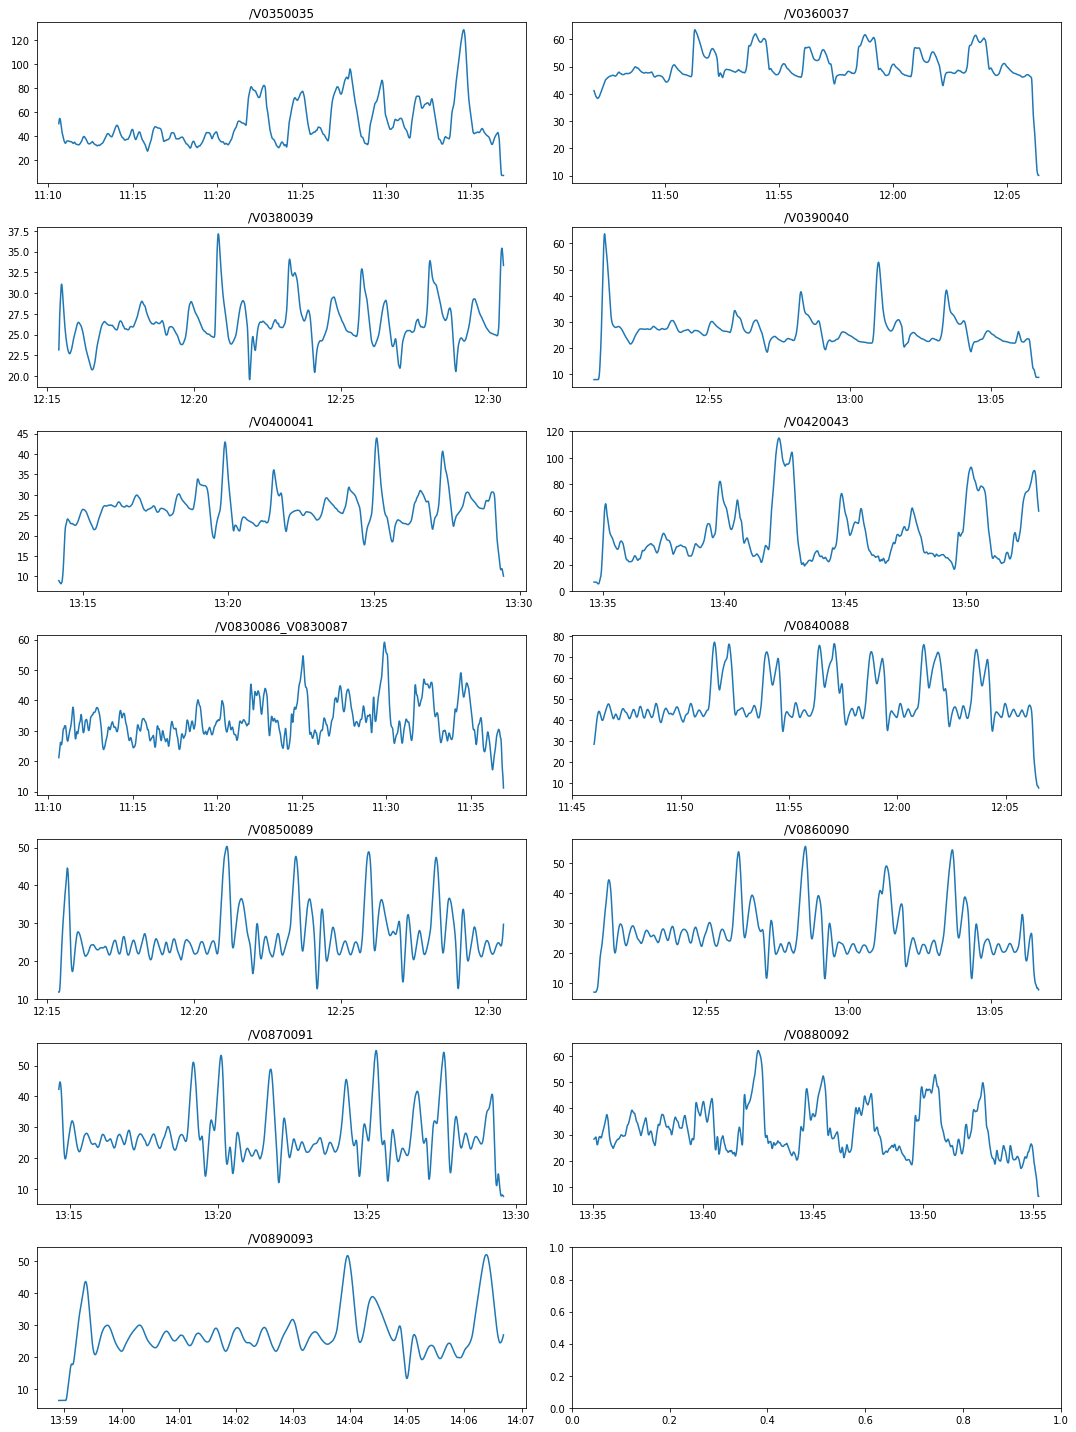

In [442]:
fig, axs = plt.subplots(7, 2)
fig.set_size_inches(15, 20)
ax = axs.reshape(-1)
with HDFStore('../data/clean/car_distances.h5', mode='r') as store_r:
    for idx, f in enumerate(store_r):
        ax[idx].plot(store_r[f].utc_timestamp, store_r[f].iloc[:, 1])
        #ax[idx].plot(store_r[f][store_r[f].iloc[:, 1].isna()].index, '.')
        ax[idx].set_title(f)
        ax[idx].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        print('{}: Size of table is {}, there are {} NaNs {:0.4}%'.format(f, store_r[f].shape, 
                                                store_r[f].iloc[:, 1].isna().sum(), 
                                                store_r[f].iloc[:, 1].isna().sum() / store_r[f].shape[0] * 100))
plt.tight_layout()
plt.show()

Since we have computed the offsets, we will be able to do:

In [443]:
with HDFStore('../data/clean/car_distances.h5', mode='r') as store_r:
    test = pd.read_hdf(store_r, 'V0350035')

min_utc, max_utc = test.utc_timestamp.min(), test.utc_timestamp.max()
display(test.head())
aux = test[(test.utc_timestamp >= min_utc + pd.to_timedelta(df_ord.loc[0, 'tesla_left_offset'], 's')) & \
           (test.utc_timestamp <= max_utc - pd.to_timedelta(df_ord.loc[0, 'tesla_right_offset'], 's'))]
display(aux.head())
display(aux.tail())
aux.iloc[:, 1].isna().sum()

,utc_timestamp,dist_tesla_a8
3139,2019-07-04 11:09:47.068,NaN
3140,2019-07-04 11:09:47.168,NaN
3141,2019-07-04 11:09:47.268,NaN
3142,2019-07-04 11:09:47.368,NaN
3143,2019-07-04 11:09:47.468,NaN


,utc_timestamp,dist_tesla_a8
3643,2019-07-04 11:10:37.468,50.507329
3644,2019-07-04 11:10:37.568,50.768418
3645,2019-07-04 11:10:37.668,51.026237
3646,2019-07-04 11:10:37.768,51.279184
3647,2019-07-04 11:10:37.868,51.524908


,utc_timestamp,dist_tesla_a8
19427,2019-07-04 11:36:55.868,7.281442
19428,2019-07-04 11:36:55.968,7.284215
19429,2019-07-04 11:36:56.068,7.287331
19430,2019-07-04 11:36:56.168,7.290241
19431,2019-07-04 11:36:56.268,7.293147


0

Or just select the ones that have a distance different from `nan`.

## Adjust distances

To finish this notebook, we are going to adjust the distances from the D-GPS device to the front and back bumper. In order to do so, we will use the following table:

In [2]:
df_bumper = pd.read_csv('../data/raw/labeled/veh_dim.csv', index_col=0)
df_bumper

,a2fb ubx,a2bb ubx,a2fb azd,a2bb azd,height,length
vehicle,,,,,,
A8,2410,2786,4577,619,1471,5196
Aclass,2000,2464,3770,694,1440,4464
X5,2150,2807,4003,954,1776,4957
Tesla,2100,2606,3215,1491,1420,4706
A6,2080,2877,4226,731,1459,4957


In [3]:
cars = {'a8': 'A8',
        'mercedes': 'Aclass',
        'bmw': 'X5',
        'tesla': 'Tesla',
        'a6': 'A6'}

In [4]:
with HDFStore('../data/clean/car_distances.h5', mode='r') as store_r:
    with HDFStore('../data/clean/car_distances_adjusted.h5', mode='a', complib='blosc:lz4hc', complevel=9) as store_w:
        for idx, f in enumerate(store_r):
            df = store_r[f]
            aux = df.columns[1].split('_')
            a2fb = df_bumper.loc[cars[aux[1]], 'a2fb azd'] / 1000 # mm to meters
            a2bb = df_bumper.loc[cars[aux[2]], 'a2bb azd'] / 1000 # mm to meters
            df.iloc[:, 1] = df.iloc[:, 1] - a2fb - a2bb
            df = df[~df.iloc[:, 1].isna()]
            # Special cases
            if f == '/V0400041':
                df = df.iloc[:-1, :]
            elif f == '/V0880092':
                df = df.iloc[:-5, :]
            store_w.append(f, df, format='table', append=True)

Check new distances:

/V0350035: Size of table is (15791, 2), there are 0 NaNs 0.0%
/V0360037: Size of table is (11720, 2), there are 0 NaNs 0.0%
/V0380039: Size of table is (9076, 2), there are 0 NaNs 0.0%
/V0390040: Size of table is (9457, 2), there are 0 NaNs 0.0%
/V0400041: Size of table is (9162, 2), there are 0 NaNs 0.0%
/V0420043: Size of table is (11043, 2), there are 0 NaNs 0.0%
/V0830086_V0830087: Size of table is (15791, 2), there are 0 NaNs 0.0%
/V0840088: Size of table is (12314, 2), there are 0 NaNs 0.0%
/V0850089: Size of table is (9076, 2), there are 0 NaNs 0.0%
/V0860090: Size of table is (9374, 2), there are 0 NaNs 0.0%
/V0870091: Size of table is (8975, 2), there are 0 NaNs 0.0%
/V0880092: Size of table is (12125, 2), there are 0 NaNs 0.0%
/V0890093: Size of table is (4670, 2), there are 0 NaNs 0.0%


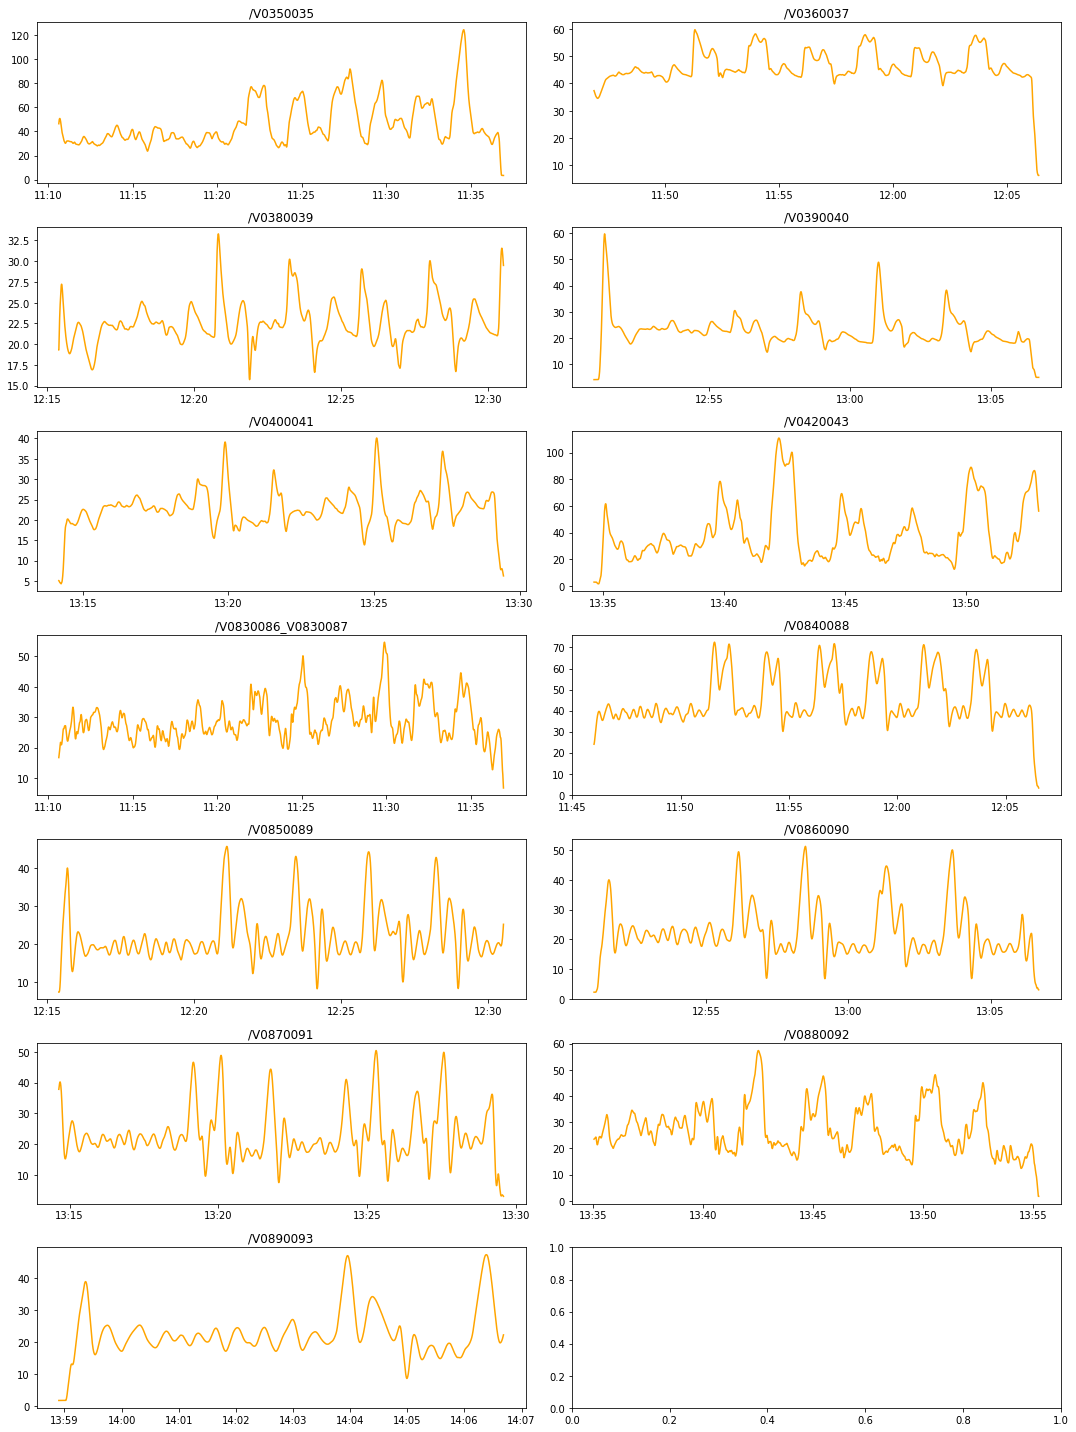

In [5]:
fig, axs = plt.subplots(7, 2)
fig.set_size_inches(15, 20)
ax = axs.reshape(-1)
with HDFStore('../data/clean/car_distances_adjusted.h5', mode='r') as store_r:
    for idx, f in enumerate(store_r):
        ax[idx].plot(store_r[f].utc_timestamp, store_r[f].iloc[:, 1], color='orange')
        ax[idx].set_title(f)
        ax[idx].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        print('{}: Size of table is {}, there are {} NaNs {:0.4}%'.format(f, store_r[f].shape, 
                                                store_r[f].iloc[:, 1].isna().sum(), 
                                                store_r[f].iloc[:, 1].isna().sum() / store_r[f].shape[0] * 100))
plt.tight_layout()
plt.show()